In [1]:
#extrapolate sca onto mm datasets
# 1. train algo on all data sets available
# 2. apply to all multi-omics datasets aviable
# 3. identify features which have statistical correlation
# 4. improve multi-view algo until it predicts perturbations at earliest possible onset -> 
# 5. find adjacent problems worth solving

#invent algorithm for detecting pertrubations 
#loop through every high_variable_column
#loop through every row
#fidn rows where 1 gene is above zscore
# find orthogonal features of 7000 element matrix
# cant do that without iteration to find nonlinear statistical relationship occurances
# remove noise
# find where columns overlap 
# attempt to cluster in batches of 100
# happiest bear in the world - (infinite thank you + apologetic) 4ever
# dont affect stream negatively - always think of effect on others 
# dont take any breaks
# finsih this problem by noon - continue everyday forever for 100 years
# https://zenodo.org/record/6546964


# classify how different perturbations contain different profiles of information distance

#many people just want a cool matrix transform that encodes probabilitiy from gene expression matrix
# we dont want dimensionality reduction
#most people just want it to work asap and dont care 
#eggnog wants to be silent typist and wants everyone in stream to be happy - also finish by noon 
#timebox - what can be solved in 2-12?
#go to austin tomorrow - chill w/ computer

#5000 x 2000 = too slow for python
#other datasets 100x more data

#determine what causes the variation in the gene expression profile
#which gene contribute most magnitude in amplitude
#filter data that isnt relevant 
#whats left is is just the perturbations (depending on experiment intent and data)
#

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results
adata = sc.read_10x_mtx(
    'data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)      
sc.pp.highly_variable_genes(adata, 
                                layer=None, 
                                n_top_genes=200, 
                                min_disp=0.5, 
                                max_disp=1, 
                                min_mean=0.0125, 
                                max_mean=3, 
                                span=0.3, 
                                n_bins=20, 
                                flavor='seurat_v3', 
                                subset=False, 
                                inplace=True, 
                                batch_key=None, 
                                check_values=True)

In [3]:
from scipy.sparse import csr_matrix, find
import numpy as np
import warnings
import pandas 
import numpy as np
from torch import tensor
import torch, numpy as np, pandas as pd
import torch.optim as optim
from collections import defaultdict
rowGeneExpression2 = defaultdict(dict)
import math
import torch
pandas.set_option('mode.use_inf_as_na', True)
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import os
os.environ["PYTHONWARNINGS"] = "ignore"
import scanpy as sc
from torch import tensor
import torch, numpy as np, pandas as pd
import torch.optim as optim
import torch.nn as nn
from torch import tensor
import torch, numpy as np, pandas as pd
import torch.optim as optim
from fastai.data.transforms import RandomSplitter
from collections import defaultdict
from scipy.sparse import csr_matrix, tril

import matplotlib.pyplot as plt
import numpy as np
from fastprogress.fastprogress import progress_bar
from fastprogress.fastprogress import master_bar 
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)
#one ='DatlingerBock2021.h5ad'
#one = 'AissaBenevolenskaya2021.h5ad'
#one = 'AissaBenevolenskaya2021.h5ad'
folders = '/home/awahab/llm-testing/data_sets/'
#one = 'AdamsonWeissman2016_GSM2406675_10X001.h5ad' #sigmoid returns nan in 0th frame
one ='DatlingerBock2017.h5ad'
one = 'AissaBenevolenskaya2021.h5ad'
one = 'SrivatsanTrapnell2020_sciplex2.h5ad'
one ='DatlingerBock2017.h5ad'
#one = 'AdamsonWeissman2016_GSM2406675_10X001.h5ad'
#one = 'AissaBenevolenskaya2021.h5ad'
#one = 'XieHon2017.h5ad'
#one = 'SrivatsanTrapnell2020_sciplex2.h5ad'
def readFiles():
    adata = sc.read_h5ad(folders + one)
    one ='DatlingerBock2017.h5ad'
    return adata
adata = sc.read_h5ad(folders + one)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, 
                                layer=None, 
                                n_top_genes=200, 
                                min_disp=0.5, 
                                max_disp=1, 
                                min_mean=0.0125, 
                                max_mean=3, 
                                span=0.3, 
                                n_bins=20, 
                                flavor='seurat_v3', 
                                subset=False, 
                                inplace=True, 
                                batch_key=None, 
                                check_values=True)

sc.pp.pca(adata)
found = find(adata.X)
torch.manual_seed(440)
#adata.obs.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
#adata.obs = adata.iloc[:5000]
#adata.obs= adata.obs[adata.obs.iloc[:5000]]
#adata.obs.iloc[:5000]
#adata.var_names
var_df = adata.var
df = adata.obs#.iloc[:5000]
df = df.drop(columns=['nperts'])
df['percent_mito'] = 1
def getMode(l): 
    return max(set(l), key=l.count)
#sc.pp.filter_cells(adata, min_counts=None, min_genes=None, max_counts=None, max_genes=10, inplace=True, copy=False)
#sc.pp.filter_genes(adata, min_counts=None, min_cells=None, max_counts=None, max_cells=None, inplace=True, copy=False)
#sc.pp.highly_variable_genes(adata, layer=None, n_top_genes=None, min_disp=0.5, max_disp=inf, min_mean=0.0125, max_mean=3, span=0.3, n_bins=20, flavor='seurat', subset=False, inplace=True, batch_key=None, check_values=True)
#sc.pp.regress_out(adata, keys, n_jobs=None, copy=False)
#cell perturbation is defined as molecular response or gene expression that is different to what is "normal"
from IPython.display import IFrame
#check for expression values that are equal from crispr
#join with gene ontology
#this is a program
#input an adata file
#outputs a list of cell-IDs and the genes perturbed 
#and then what that gene does 
#and what interactions may occur with those perturbations 
from sklearn.preprocessing import LabelEncoder
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
#df['chembl-ID'] = label_encoder1.fit_transform(df['chembl-ID'])
df['perturbation_2'] = label_encoder1.fit_transform(df['perturbation_2'])
df['target_2'] = label_encoder2.fit_transform(df['target'])
cool_columns = 'ncounts ngenes percent_mito percent_ribo'.split(' ')
for key in cool_columns:
    ct = adata.obs[adata.obs['perturbation'] == 'control'][key].std()
    pt = adata.obs[adata.obs['perturbation'] != 'control'][key].std()
    print(key, '      ctrl =   ', ct, '   pert = ', pt)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

ncounts       ctrl =    7085.9976    pert =  7251.1616
ngenes       ctrl =    1460.5028512358208    pert =  1472.5600646518021
percent_mito       ctrl =    2.642741    pert =  2.799472
percent_ribo       ctrl =    3.813907    pert =  3.8422022


In [4]:
from torch import tensor
import torch, numpy as np, pandas as pd
import torch.optim as optim

from fastai.data.transforms import RandomSplitter
from collections import defaultdict

numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].fillna(0)
numerical_values = df.select_dtypes(include=[int, float]).values.tolist()
numerical_values
rowGeneExpression = defaultdict(int)
hv_genes = set(list(var_df[var_df['highly_variable'] == True].index))
normal_genes = (list(adata.var_names))
high_variance_columns = set([ i for i,val in enumerate(normal_genes) if val in hv_genes ])
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].fillna(0)
sums = []
column_averages = defaultdict(list)
rowGeneExpression = defaultdict(int)
rows, columns, vals = found
high_variance = set(high_variance_columns)
row_id = 0
control_variables = set(['ctrl', 'control', '*'])
dependent_variables = list(df['perturbation'].map(lambda val: 0 if val in control_variables else 1).values)
geneValues = defaultdict(int)
columnMode = defaultdict(list)
geneAverages = defaultdict(int)
geneOccurences = defaultdict(int)
geneVariance = defaultdict(list)
cell_variance_score = defaultdict(int)

row_variance = [] 
c,g,v = found

cell_variance_score = {}
for i in range(df.shape[0]): cell_variance_score[i]= 0

for cell,gene,val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    geneValues[gene] += val
    geneOccurences[gene] += 1
    columnMode[gene].append(val)
    
for k in dict(geneValues):
    geneAverages[k] =  geneValues[k] / geneOccurences[k]
    
for k in dict(geneValues): columnMode[k] = getMode(columnMode[k])
    
for cell, gene, val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    geneVariance[gene].append(abs(val - geneAverages[gene]))# ** 2
    
    
for k in dict(geneAverages):  
    geneVariance[k] = max(set(geneVariance[k]), key=geneVariance[k].count)

geneModes = defaultdict(list)

for cell, gene, val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    geneModes[gene].append(abs(val))# ** 2

for val in geneModes: geneModes[val] = max(set(geneModes[val]), key=geneModes[val].count)

num_cells = len(df.select_dtypes(include=[int, float]).values.tolist())
    
mini_cell_var = defaultdict(list)
for cell, gene, val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    columnColor = geneAverages[gene]
    cellColorForGene = val
    threshold = columnColor
    if (cellColorForGene - columnColor) < 0:
        mini_cell_var[cell].append(cellColorForGene - columnColor)
        cell_variance_score[cell] += abs(cellColorForGene - columnColor)
      
for key in mini_cell_var: mini_cell_var[key] = max(mini_cell_var[key])
        
df['geneVarianceScore'] = cell_variance_score.values()
numerical_values = df.select_dtypes(include=[int, float]).values.tolist()
independent_variables = pd.DataFrame(numerical_values)

vals += .01
t_dep = tensor([float(i) for i in dependent_variables]) # pertrubations
t_indep = tensor(numerical_values, dtype=torch.float)

n_coeff = t_indep.shape[1]

vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals
trn_split,val_split=RandomSplitter(seed=42)(independent_variables)

trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]

indep_cols =  df.select_dtypes(include=[int, float]).columns.tolist()
indep_cols

len([item for item in list(t_dep) if item.item() == 0])
len([item for item in list(t_dep) if item.item() > .5]) 

4585

In [5]:
cell_variance_score= defaultdict(int)
for cell, gene, val in zip(c,g,v):
    if gene not in high_variance_columns: continue
    columnColor = geneAverages[gene]
    cellColorForGene = val
    threshold = columnColor
    if abs(cellColorForGene) > columnColor and columnColor < 1:
        #mini_cell_var[cell].append(cellColorForGene - columnColor)
        cell_variance_score[cell] += abs(cellColorForGene - columnColor)
l = cell_variance_score.values()   
avg = sum(l) / len(l)
avg = 0
import random
cvs = cell_variance_score.values()
mini_cell_var.values()
total_guess = len([item for key, item in enumerate(cvs) if item > avg])
correct_guess = len([item for key, item in enumerate(cvs) if item > avg and dependent_variables[key] == 1])
perb_total =  len([item for key, item in enumerate(dependent_variables) if dependent_variables[key] == 1])
print(f'correct{correct_guess}, total_guess{total_guess}, perb_total {perb_total}, accuracy {correct_guess / total_guess}')
print(f'precision {total_guess / perb_total}')

correct722, total_guess943, perb_total 4585, accuracy 0.7656415694591728
precision 0.20567066521264996


In [6]:
# count = []
# test = defaultdict(int)
# for i in high_variance_columns:
#     m=adata.X.getcol(i).todense()
#     mode = getMode(m.tolist()[0]) 
#     avg = sum(m.tolist()[0]) / len(m.tolist()[0])
#     pert_and_above_zero = len([i for k, i in enumerate(m.tolist()) if i[0] > 0 and dependent_variables[k] > 0])
#     not_pert_and_above_zero = len([i for k, i in enumerate(m.tolist()) if i[0] > 0 and dependent_variables[k] < 1])
#     above_zero = len([i for k, i in enumerate(m.tolist()) if i[0] > 0])
#     eq_zero = len([i for k, i in enumerate(m.tolist()) if i[0] == 0])
#     test[i] = above_zero
#     cellCounts = 5904
#     if (above_zero > 30): continue # 90%
#     for key,element in enumerate(m.tolist()):
#         if element[0] > 0: count.append(key)
# print(len(set(count)))
# count = set(count)
# print(len([x for row, x in enumerate(count) if dependent_variables[x] > 0]),len([x for row, x in enumerate(count) if dependent_variables[x] < 1]))
# print(len([x for row, x in enumerate(count) if dependent_variables[x] > 0]) / len([x for row, x in enumerate(count)]))

In [7]:
category_indices = df.groupby('perturbation').apply(lambda x: x.index.tolist() )
most_cells = category_indices[2]

most_cell_indices = []
for i in most_cells:
    most_cell_indices.append(adata.obs.index.get_loc(i))

a=most_cell_indices[0]
b=most_cell_indices[10]

b_matrix = adata.X.getrow(b).todense().tolist()[0]
a_matrix = adata.X.getrow(a).todense().tolist()[0]

a_matrix
print(len(most_cells))
sum(a_matrix), sum(b_matrix)
count = {}
        
distance = defaultdict(int)
indicesAbove = defaultdict(list)

for row in range(5904):
    m = adata.X.getrow(row).todense().tolist()[0]
    for k in high_variance_columns:
        if (geneAverages[k]) < m[k] and m[k] < 100:
            distance[k] += m[k]
            indicesAbove[row].append(k)
            
distance_max = max(list(distance.values()))

for k in distance:
    if distance[k] == distance_max: print(k)

13
12156


In [8]:
#scipy.stats.zscore(adata.X.getcol(0).todense().tolist())
indicesAbove = dict(indicesAbove)
# for cell,gene,val in zip(c,g,v):
#     if gene not in high_variance_columns: continue
#     geneValues[gene] += val
#     geneOccurences[gene] += 1
#     columnMode[gene].append(val)

timesAbove = defaultdict(int)
geneAboveMeanOccurances = defaultdict(list)

for row in dict(indicesAbove): 
    for column in indicesAbove[row]: 
        geneAboveMeanOccurances[column].append(row)
        
prob_perts = {} 

filteredGeneCellLists = defaultdict(list)

threshold = 30

for geneList in geneAboveMeanOccurances:
    cellsWithGene = geneAboveMeanOccurances[geneList]
    if  threshold < len(cellsWithGene) and len(cellsWithGene) < 100:
        filteredGeneCellLists[geneList] = cellsWithGene

cellToGeneEmbedding = [[] for i in range(5904)]

for column in filteredGeneCellLists:
    cellList = filteredGeneCellLists[column]
    for cellRow in cellList:
        cellToGeneEmbedding[cellRow].append(column)
    
cellToGeneEmbedding

cellCount = 0
for cellList in list(filteredGeneCellLists.values()):
    cellCount += len(cellList)
    
totalCells = []
for key in (filteredGeneCellLists.keys()):
    cellList = filteredGeneCellLists[key]
    totalCells += cellList
    for cell in cellList:
        gene = adata.var.iloc[cell].name
        row = df.iloc[cell]
        
len(set(totalCells))

len([item for key, item in enumerate(t_dep) if item.item() > .5 and key in totalCells])
total = defaultdict(int)
for row in range(500):
    total[row] += sum(adata.X.getrow(row).data)
avg = sum(list(total.values())) / 500

counter = 0
for key, item in enumerate(list(total.values())):
    if item > avg:
        counter += 1
        
counter
count_per_category = df.groupby('perturbation').size()

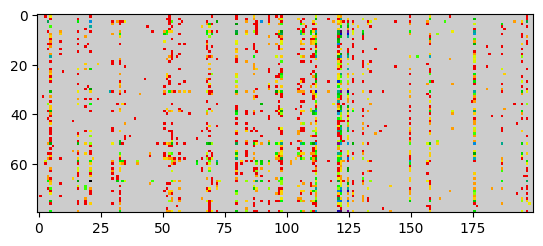

In [9]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Replace NaN values with 0 only in numerical columns
df[numerical_columns] = df[numerical_columns].fillna(0)

numerical_values = df.select_dtypes(include=[int, float]).values.tolist()
numerical_values
rowGeneExpression = defaultdict(int)

hv_genes = set(list(var_df[var_df['highly_variable'] == True].index))
normal_genes = (list(adata.var_names))

high_variance_columns = set([ i for i,val in enumerate(normal_genes) if val in hv_genes ])

numerical_columns = df.select_dtypes(include=['number']).columns

# Replace NaN values with 0 only in numerical columns
df[numerical_columns] = df[numerical_columns].fillna(0)

sums = []

column_averages = defaultdict(list)
rowGeneExpression = defaultdict(int)
rows, columns, vals = found
high_variance = set(high_variance_columns)
row_id = 0

embedLayer = []
for i in high_variance_columns:
        intermediate = []
        for i in adata.X.getcol(i).toarray():
            intermediate.append(i[0])
        embedLayer.append(intermediate)

mat_for_embed = np.random.rand(t_dep.shape[0], 200)
for key,col in enumerate(list(high_variance_columns)[:200]):
    m= adata.X.getcol(col)
    m = m.todense().tolist()
    for row,val in enumerate(m):
        mat_for_embed[row, key] = val[0]

a = mat_for_embed
plt.imshow(a[:80], cmap='nipy_spectral_r', interpolation='nearest')
plt.show()

In [10]:
# # # http# ! pip install biomart
# # mito_gene_names = sc.queries.mitochondrial_genes("hsapiens")
# # mito_ensembl_ids = sc.queries.mitochondrial_genes("hsapiens", attrname="ensembl_gene_id")
# # mito_gene_names_fly = sc.queries.mitochondrial_genes("dmelanogaster", chromosome="mitochondrion_genome")
# # import scanpy as sc
# # sc.queries.enrich(['KLF4', 'PAX5', 'SOX2', 'NANOG'], org="hsapiens")
# # sc.queries.enrich({'set1':['KLF4', 'PAX5'], 'set2':['SOX2', 'NANOG']}, org="hsapiens")
# # pbmcs = sc.datasets.pbmc68k_reduced()
# # sc.tl.rank_genes_groups(pbmcs, "bulk_labels")
# # sc.queries.enrich(pbmcs, "CD34+")
# # # pbmcs
# # category_indices = df.groupby('perturbation').apply(lambda x: x.index.tolist() )
# # df.index.get_loc('TACTTGACCCCN')
# # allRows = defaultdict(int)
# # categories = df['perturbation'].unique()
# # for i, group in enumerate(category_indices):
# #     for row in group:
# #         allRows[categories[i]] += 1
        
# # df.groupby('perturbation')

# # categories
# # len(category_indices)

# # groupCellCounts = list(allRows.values())

# # nonZerosInColumn = list(test.values())

# # for k,v in enumerate(groupCellCounts):
# #     cellCount = nonZerosInColumn[k]
# # # from ipywidgets import interact
# # # trn_xs = [1,2,3,4,5]
# # # conts=['Age', 'SibSp', 'Parch', 'LogFare',"Pclass"]

# # # def iscore(nm, split):
# # #     col = trn_xs[nm]
# # #     return score(col, trn_y, split)
# # # interact(nm=conts, split=15.5)(iscore);
# #just get it working - improve it now
# from torch import nn
# import torch
# def conv(ni, nf, ks=3, stride=1, act=True):
#     res = nn.Conv1d(ni, nf, stride=stride, kernel_size=ks, padding=ks//2)
#     if act: res = nn.Sequential(res, nn.ReLU())
#     return res

# def deconv(ni, nf, ks=3, act=True):
#     layers = [
#     #    nn.UpsamplingNearest2d(scale_factor=2),
#               nn.Conv2d(ni, nf, stride=1, kernel_size=ks, padding=ks//2)
#     ]
#     if act: layers.append(nn.ReLU())
#     return nn.Sequential(*layers)

# #data /= torch.max(data , 1)
# #sort them by cluster and back
# finishDemoBy6 = nn.Sequential(
#     #nn.RNN(200, 200),
#     torch.nn.Linear(200, 200),
#     nn.Tanhshrink(),
#     #nn.PairwiseDistance(p=2),
#     conv(5905,5905, 3),       
#     nn.AvgPool1d(101, stride=1),
#     conv(5905,5905),
#     nn.BatchNorm1d(100),
#     nn.AvgPool1d(51, stride=1),
#     #conv(5905,5905), 
#     nn.AvgPool1d(48, stride=1),
#     nn.Sigmoid()
# ).to('cuda:0')

# num_input_channels = 3
# c_hid=16
# latent_dim = 64
# finishDemoBy6= nn.Sequential(
#         nn.Conv2d(1, c_hid, kernel_size=2, padding=1, stride=2),  # 32x32 => 16x16
#            nn.Conv2d(c_hid, c_hid, kernel_size=3, padding=1),
#            nn.Conv2d(c_hid, 2 * c_hid, kernel_size=3, padding=1, stride=2),  # 16x16 => 8x8
#            nn.Conv2d(2 * c_hid, 2 * c_hid, kernel_size=3, padding=1),
#            nn.Conv2d(2 * c_hid, 3, kernel_size=3, padding=0, stride=1),  # 8x8 => 4x4
#            #nn.Flatten(),  # Image grid to single feature vector
# #             nn.Linear(2 * 16 * c_hid, 3),
# )

# opt = optim.SGD(finishDemoBy6.parameters(), lr=0.01)
# loss_function2 = torch.nn.MSELoss()
# opt = optim.SGD(finishDemoBy6.parameters(), lr=0.01)
# loss_function2 = torch.nn.MSELoss()
# data = torch.Tensor(mat_for_embed).cuda()
# for i in range(50):
#     encodedOutput = (finishDemoBy6(data))
# #     loss = loss_function2(encodedOutput.sum(1), t_dep.cuda())
# #     opt.zero_grad()  # 3
# #     loss.backward()
#     opt.step()
# encodedOutput.to('cuda:0')
# encodedOutput
# Z = adata.X.A
# encodedOutput
#

In [40]:
# # http# ! pip install biomart
# mito_gene_names = sc.queries.mitochondrial_genes("hsapiens")
# mito_ensembl_ids = sc.queries.mitochondrial_genes("hsapiens", attrname="ensembl_gene_id")
# mito_gene_names_fly = sc.queries.mitochondrial_genes("dmelanogaster", chromosome="mitochondrion_genome")
# import scanpy as sc
# sc.queries.enrich(['KLF4', 'PAX5', 'SOX2', 'NANOG'], org="hsapiens")
# sc.queries.enrich({'set1':['KLF4', 'PAX5'], 'set2':['SOX2', 'NANOG']}, org="hsapiens")
# pbmcs = sc.datasets.pbmc68k_reduced()
# sc.tl.rank_genes_groups(pbmcs, "bulk_labels")
# sc.queries.enrich(pbmcs, "CD34+")
# # pbmcs
# category_indices = df.groupby('perturbation').apply(lambda x: x.index.tolist() )
# df.index.get_loc('TACTTGACCCCN')
# allRows = defaultdict(int)
# categories = df['perturbation'].unique()
# for i, group in enumerate(category_indices):
#     for row in group:
#         allRows[categories[i]] += 1
       
# df.groupby('perturbation')

# categories
# len(category_indices)

# groupCellCounts = list(allRows.values())

# nonZerosInColumn = list(test.values())

# for k,v in enumerate(groupCellCounts):
#     cellCount = nonZerosInColumn[k]
# # from ipywidgets import interact
# # trn_xs = [1,2,3,4,5]
# # conts=['Age', 'SibSp', 'Parch', 'LogFare',"Pclass"]

# # def iscore(nm, split):
# #     col = trn_xs[nm]
# #     return score(col, trn_y, split)
# # interact(nm=conts, split=15.5)(iscore);
#just get it working - improve it now
# num_input_channels: int, base_channel_size: int, latent_dim: int, act_fn: object = nn.GELU):
class Encoder(nn.Module):
    def __init__(self, num_input_channels: int, base_channel_size: int, latent_dim: int, act_fn: object = nn.GELU):
        """
        Args:
           num_input_channels : Number of input channels of the image. For CIFAR, this parameter is 3
           base_channel_size : Number of channels we use in the first convolutional layers. Deeper layers might use a duplicate of it.
           latent_dim : Dimensionality of latent representation z
           act_fn : Activation function used throughout the encoder network
        """
        super().__init__()
        c_hid = base_channel_size
        self.net = nn.Sequential(
            nn.Conv2d(num_input_channels, c_hid, kernel_size=3, padding=1, stride=2),  # 32x32 => 16x16
            act_fn(),
            nn.Conv2d(c_hid, c_hid, kernel_size=3, padding=1),
            act_fn(),
            nn.Conv2d(c_hid, 2 * c_hid, kernel_size=3, padding=1, stride=2),  # 16x16 => 8x8
            act_fn(),
            nn.Conv2d(2 * c_hid, 2 * c_hid, kernel_size=3, padding=1),
            act_fn(),
            nn.Conv2d(2 * c_hid, 2 * c_hid, kernel_size=3, padding=1, stride=2),  # 8x8 => 4x4
            act_fn(),
            nn.Flatten(),  # Image grid to single feature vector
            nn.Linear(2 * 16 * c_hid, latent_dim),
        )

    def forward(self, x):
        return self.net(x)
from torch import nn
import torch
def conv(ni, nf, ks=3, stride=1, act=True):
    res = nn.Conv1d(ni, nf, stride=stride, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

def deconv(ni, nf, ks=3, act=True):
    layers = [
    #    nn.UpsamplingNearest2d(scale_factor=2),
              nn.Conv2d(ni, nf, stride=1, kernel_size=ks, padding=ks//2)
    ]
    if act: layers.append(nn.ReLU())
    return nn.Sequential(*layers)

#data /= torch.max(data , 1)
#sort them by cluster and back
c_hid=16
latent_dim = 3
kernel_size = (1, 5)
finishDemo= nn.Sequential(
            nn.Conv2d(1, c_hid, kernel_size=(1, 5)),  # 32x32 => 16x16
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.Conv2d(c_hid, c_hid, kernel_size=kernel_size),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.Conv2d(c_hid, 2 * c_hid, kernel_size=kernel_size),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.Conv2d(2 * c_hid, 2 * c_hid, kernel_size=kernel_size),
            nn.LeakyReLU(), #L
            nn.Tanh(),
            nn.Conv2d(2 * c_hid, 1, kernel_size=kernel_size),  # 8x8 => 4x4
            nn.Linear(180, 3)
).to('cuda:0')

opt = optim.SGD(finishDemo.parameters(), lr=0.01)
loss_function2 = torch.nn.MSELoss()
data = torch.Tensor([[mat_for_embed]]).to('cuda')

for i in range(5):
    encodedOutput = (finishDemo(data.to('cuda:0')))
    loss = loss_function2(encodedOutput.squeeze().sum(1), t_dep.cuda())
    opt.zero_grad()  # 3
    loss.backward()
    opt.step()
encodedOutput.to('cuda:0')
encodedOutput = (finishDemo(data))
tensor = encodedOutput
tensor = tensor.squeeze()
tensor
print(tensor.shape)
#spongebob
#tensor

torch.Size([5905, 3])


In [37]:
# for i in range(tensor.sum(1).shape[0])
#     print(tensor.sum(1))
import scvi

#tensor.sum(1)
#simplify model, use a decoder, use another simple function on ('latent representation') to figure out stochastic relationships between columns and 
#mean, variance, 

torch.Size([5905, 3])

In [24]:
# for latent_dim in [64, 128, 256, 384]:
#     model_ld, result_ld = train_cifar(latent_dim)
#     model_dict[latent_dim] = {"model": model_ld, "result": result_ld}
#     print(model_dict)
    
    
# model = model_dict[128]["model"]
# model = model_dict[256]["model"]    

In [15]:
# plain_imgs = torch.zeros(4, 3, 32, 32)

# # Single color channel
# plain_imgs[1, 0] = 1
# # Checkboard pattern
# plain_imgs[2, :, :16, :16] = 1
# plain_imgs[2, :, 16:, 16:] = -1
# # Color progression
# xx, yy = torch.meshgrid(torch.linspace(-1, 1, 32), torch.linspace(-1, 1, 32))
# plain_imgs[3, 0, :, :] = xx
# plain_imgs[3, 1, :, :] = yy

# visualize_reconstructions(model_dict[256]["model"], plain_imgs)

In [16]:
# for latent_dim in model_dict:
#     visualize_reconstructions(model_dict[latent_dim]["model"], input_imgs)

In [28]:
dev = 'cuda:0'
def test_prediction(test_predictions):
    ctrl = test_predictions.sum(1).tolist()[0]
    isFalse = len([sum(row) for idx, row in enumerate(test_predictions.tolist()) if sum(row) <= ctrl and t_dep[idx] == 0])
    isTrue = len([sum(row) for idx, row in enumerate(test_predictions.tolist()) if sum(row) > ctrl and t_dep[idx] == 1])
    allFalse = len([sum(row) for idx, row in enumerate(test_predictions.tolist()) if t_dep[idx] == 0])
    allTrue = len([sum(row) for idx, row in enumerate(test_predictions.tolist()) if t_dep[idx] == 1])
    return (isFalse / allFalse, isTrue / allTrue, isFalse, isTrue)
def plot_loss(l):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20, 4))
    legends = []
    plt.plot(l) 
    plt.plot([0, len([i for k,i in enumerate(rowGeneExpression.values()) if dependent_variables[k]])], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
    plt.legend(legends);

numerical_values = df.select_dtypes(include=[int, float]).values.tolist()
t_indep = torch.Tensor(numerical_values).to(dev)
#t_indep = t_indep / vals
#λλλλλ.requires_grad_(True)
#3 variations, test, t_indep and t_indep+embedding
resultant_tensor = t_indep
encodedOutput.requires_grad_(True)
resultant_tensor = torch.cat((t_indep.to(dev),tensor.to(dev)), 1)
#resultant_tensor = λλλλλ
resultant_tensor = tensor


vals,indices = resultant_tensor.max(dim=0)
resultant_tensor = resultant_tensor / vals
resultant_tensor = resultant_tensor.to(dev)
test_indep = torch.tensor([[t_dep[k].item() for i in enumerate(range(resultant_tensor.shape[1]))] for k, i in enumerate(range(resultant_tensor.shape[0]))])
dim = resultant_tensor.shape[1]

model = torch.nn.Sequential(
    torch.nn.Linear(dim,dim),
    nn.ReLU(),
    nn.Linear(dim,dim),
    nn.ReLU(),
    nn.Linear(dim, dim),
    nn.Sigmoid()
).to(dev)

optimizer = torch.optim.SGD(
    model.parameters(), 
    lr=.1, 
    weight_decay=0.01
)
# model = model.to(device)
# input_tensor = input_tensor.to(device)

n_iterations = 1000
loss_track = []
accuracy_track = []
no_entropy = []
loss_function = torch.nn.BCELoss()
def plot_loss_update(epoch, epochs, mb, train_loss, valid_loss):
    """ dynamically print the loss plot during the training/validation loop.
        expects epoch to start from 1.
    """
    x = range(1, epoch+1)
    y = np.concatenate((train_loss, valid_loss))
    graphs = [[x,train_loss], [x,valid_loss]]
    x_margin = 0.2
    y_margin = 0.05
    x_bounds = [1-x_margin, epochs+x_margin]
    y_bounds = [np.min(y)-y_margin, np.max(y)+y_margin]

    mb.update_graph(graphs, x_bounds, y_bounds)
mb = master_bar(range(1))
def plot_loss_update(epoch, epochs, mb, train_loss, valid_loss):
    """ dynamically print the loss plot during the training/validation loop.
        expects epoch to start from 1.
    """
    x = range(1, epoch+1)
    y = np.concatenate((train_loss, valid_loss))
    graphs = [[x,train_loss], [x,valid_loss]]
    x_margin = 0.2
    y_margin = 0.05
    x_bounds = [1-x_margin, epochs+x_margin]
    y_bounds = [np.min(y)-y_margin, np.max(y)+y_margin]
    mb.update_graph(graphs, x_bounds, y_bounds)

for i in mb:    
#for j in progress_bar(range(2000), parent=mb):
    for j in progress_bar(range(200)):
        loss = loss_function(model(resultant_tensor).sum(1).sigmoid(), t_dep.to(dev))
        optimizer.zero_grad()  # 3
        loss.backward(retain_graph=True)  # 4
        optimizer.step()  # 5
        if j == 1 or j % 50 == 0:
            test_predictions = model(resultant_tensor)
            #print(loss.item(), test_predictions.sum().item() / 8)
            print(test_prediction(test_predictions))
        loss_track.append(loss.item())
        accuracy_track.append(test_predictions.sum().item() / 8)
        no_entropy += [test_predictions.sum().item() / 8]
#         k = 100 * i + j
#         x = np.arange(0, 2*k*np.pi/1000, 0.01)
#         y1, y2 = np.cos(x), np.sin(x)
#         graphs = [[x,y], [x,y2]]
#         x_bounds = [0, 2*np.pi]
#         y_bounds = [-1,1]
        #mb.update_graph(graphs, x_bounds, y_bounds)
        #print(loss_track, accuracy_track)
        #plot_loss_update(j, n_iterations, mb, loss_track, accuracy_track)
    # emulate validation sub-loop
        #for batch in progress_bar(range(2), parent=mb): sleep(0.2)

(0.23939393939393938, 0.7448200654307524, 316, 3415)
(0.23863636363636365, 0.7465648854961832, 315, 3423)
(0.22803030303030303, 0.7552889858233369, 301, 3463)
(0.22803030303030303, 0.7552889858233369, 301, 3463)
(0.22803030303030303, 0.7550708833151581, 301, 3462)


In [18]:
count = 0
cont_keys = {}
for key in filteredGeneCellLists:
    cont_keys[key] = count
    count += 1
continuousFilteredGeneCellLists = {}
for k in list(filteredGeneCellLists.keys()):
    continuousFilteredGeneCellLists[cont_keys[k]] = filteredGeneCellLists[k]
#continuousFilteredGeneCellLists
#cont_keys
#len(list(continuousFilteredGeneCellLists.keys()))
#cellCountWithinGroup
#zscore
#continuousFilteredGeneCellLists check
# x = cells in group(s) , cellCountWithinGroup
# y = genes affected 
# z = cluster number
#for each cell
#make a graph -> 
#negative * negative = positive, 
#x  cluster "name" or index (clusters should change)
#y = genes above/below threshold 
#z = total dist above threshold
#convert 200 dimensions to 3
cellGroups = [0 for i in list(range(5905))]
cellGroupLengths = [0 for i in list(range(5905))]
cellDistCounts = [0 for i in list(range(5905))]
for column in continuousFilteredGeneCellLists:
    for cell in continuousFilteredGeneCellLists[column]:
        cellGroups[cell] = column
        cellGroupLengths[cell] = len(continuousFilteredGeneCellLists[column])
for idx, row in enumerate(mat_for_embed):
    for val in row: 
        cellDistCounts[idx] += val

In [19]:
# find gradient of row
#given two rows that belong to same perturbation -> return identical or similar values
#given a matrix -> return mx5 vals that can be transformed into a p-val
#capture the 'features' that can be used to reconstruct -> molecular response
# find the molecular response of each phenotype interaction or simply the gene by itself
#gradient ascent -> descent -> find distributions -> sparsify them
#ring that captures relevant known info about you and stores it cryptographically 
#given n rows and a matrix -> return a tuple that can be used to identify rows which belong to a perturbation response
#given an expression matrix -> group cells by perturbation profiles
#transcriptomics, genomics, proteinomics, metabolomics
#recorded actions -> comic generator
#script -> comic generator
#comic -> animation generator
#$https://www.youtube.com/watch?v=DzNmUNvnB04
#plot the matrix before + after - 200x6k to 3x6k -> bright colors for rows with perturbations 
#perturbations defined as belonging to a group of rows that have multiple columns that are covarying from mean-zscore
#makeCoolStuff = [[float(k) for k in range(5905)] for i in range(200)]
#https://explained.ai/regularization/index.html
#oft constraint with non-regularized loss function (blue-red) term and penalty term (orange).
#invent a new architecture 
#that captures probability of perturbation across a matrix
#https://www.10xgenomics.com/resources/datasets/5-k-a-549-lung-carcinoma-cells-no-treatment-transduced-with-a-crispr-pool-3-1-standard-6-0-0
# all_url = [
# #     "https://zenodo.org/record/7416068/files/AdamsonWeissman2016_GSM2406675_10X001.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/AdamsonWeissman2016_GSM2406677_10X005.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/AdamsonWeissman2016_GSM2406681_10X010.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/AissaBenevolenskaya2021.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/ChangYe2021.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/DatlingerBock2017.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/DatlingerBock2021.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/DixitRegev2016.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/FrangiehIzar2021_protein.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/FrangiehIzar2021_RNA.h5ad?download=1",
# #     "https://zenodo.org/record/7416068/files/GasperiniShendure2019_atscale.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/GasperiniShendure2019_highMOI.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/GasperiniShendure2019_lowMOI.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/GehringPachter2019.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/McFarlandTsherniak2020.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/NormanWeissman2019_filtered.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/PapalexiSatija2021_eccite_arrayed_protein.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/PapalexiSatija2021_eccite_arrayed_RNA.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/PapalexiSatija2021_eccite_protein.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/PapalexiSatija2021_eccite_RNA.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ReplogleWeissman2022_K562_essential.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ReplogleWeissman2022_K562_gwps.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ReplogleWeissman2022_rpe1.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SchiebingerLander2019_GSE106340.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SchiebingerLander2019_GSE115943.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SchraivogelSteinmetz2020_TAP_SCREEN__chromosome_11_screen.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SchraivogelSteinmetz2020_TAP_SCREEN__chromosome_8_screen.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ShifrutMarson2018.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SrivatsanTrapnell2020_sciplex2.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SrivatsanTrapnell2020_sciplex3.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/SrivatsanTrapnell2020_sciplex4.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/TianKampmann2019_day7neuron.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/TianKampmann2019_iPSC.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/TianKampmann2021_CRISPRa.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/TianKampmann2021_CRISPRi.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/WeinrebKlein2020.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/XieHon2017.h5ad?download=1",
#     "https://zenodo.org/record/7416068/files/ZhaoSims2021.h5ad?download=1"
# ]
#scarches.dataset.remove_sparsity(adata)
#https://docs.scarches.org/en/latest/api/models.html
# mdata = muon.read_10x_h5("pbmc_10k_protein_v3_filtered_feature_bc_matrix.h5")
# scvi.model.TOTALVI.setup_mudata(mdata, modalities={"rna_layer": "rna": "protein_layer": "prot"})
# vae = scvi.model.TOTALVI(mdata)
#https://docs.scvi-tools.org/en/stable/api/reference/scvi.module.LDVAE.html
#[i for i in test_predictions.tolist() if i < 1]
# Regularization in Logistic Regression
# Regularization is extremely important in logistic regression modeling. Without regularization, the asymptotic nature of logistic regression would keep driving loss towards 0 in high dimensions. Consequently, most logistic regression models use one of the following two strategies to dampen model complexity:
# L2 regularization.
# Early stopping, that is, limiting the number of training steps or the learning rate.
# (We'll discuss a third strategy—L1 regularization—in a later module.)
# Imagine that you assign a unique id to each example, and map each id to its own feature. If you don't specify a regularization function, the model will become completely overfit. That's because the model would try to drive loss to zero on all examples and never get there, driving the weights for each indicator feature to +infinity or -infinity. This can happen in high dimensional data with feature crosses, when there’s a huge mass of rare crosses that happen only on one example each.
# Fortunately, using L2 or early stopping will prevent this problem.
#[ x for x in [iden(sum(item), 10)  for item in test_predictions.tolist()] if x > .1]
#plot(loss_track)
def plot_loss(l):
    plt.figure(figsize=(20, 4))
    legends = []
#     blue = [i for k,i in enumerate(rowGeneExpression.values()) if dependent_variables[k]]
#     oj =[i for k,i in enumerate(rowGeneExpression.values()) if not dependent_variables[k]]
#     blue.sort()
#     oj.sort()
#     plt.plot((blue)) #blue true peturbation 
    plt.plot(l) #orange false ctrl
    #legends.append('param %d' % i)
    plt.plot([0, len([i for k,i in enumerate(rowGeneExpression.values()) if dependent_variables[k]])], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
    plt.legend(legends);
# #https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02021-3
# # Medicine Finding anomalies in radiology images, including CT, MRI, and X-ray images; counting features in pathology slides; measuring features in ultrasounds; diagnosing diabetic retinopathy
# #Biology Folding proteins; classifying proteins; many genomics tasks, such as tumor-normal sequencing and classifying clinically actionable genetic mutations; cell classification; analyzing protein/protein interactions
# #Other applications Financial and logistical forecasting, text to speech, and much more…
# # humor analysis - larry david vs seinfeld ? 
#https://www.kaggle.com/code/jhoward/why-you-should-use-a-framework
#handle "values outside of domain" by "SVM"
#random forest classifier
#logisitc regression - hard to get right
#correct transformations, outlier handling, correct interactions
#os.listdir('./data_sets')
#wget -m http://www.example.com 2>&1 | grep '^--' | awk '{ print $3 }' | grep -v '\.\(css\|js\|png\|gif\|jpg\|JPG\)$' > urls.txt
#https://academic.oup.com/bib/article/22/4/bbaa268/5943793
#plot(loss_track)
#https://terrytao.files.wordpress.com/2011/02/matrix-book.pdf
#https://academic.oup.com/bioinformatics/article/36/Supplement_2/i610/6055927?login=false

In [20]:
# #sc.pl.StackedViolin(adata, , groupby='', use_raw=None, log=False, num_categories=7, categories_order=None, title=None, figsize=None, gene_symbols=None, var_group_positions=None, var_group_labels=None, var_group_rotation=None, layer=None, standard_scale=None, ax=None, vmin=None, vmax=None, vcenter=None, norm=None)
# sc.pl.StackedViolin(adata, list(hv_genes), groupby='perturbation', dendrogram=True).show()
# hg = list(hv_genes)[100:]
# sc.pl.DotPlot(adata, hg,  groupby='perturbation').show()
# sc.pl.MatrixPlot(adata, hg, groupby='perturbation').show()
# first = adata.X.A[:100]
# second = adata.X.T.A[:100]
# perturbations = []
# for key, row in enumerate(first):
#     trackPerts = []
#     for column in row:
#         if column > 0: trackPerts.append(column)
#     print(t_dep[key].item(), len(trackPerts))
#https://datahacker.rs/003-gans-autoencoder-implemented-with-pytorch/
#https://blog.paperspace.com/adversarial-autoencoders-with-pytorch/
#https://www.cs.toronto.edu/~larocheh/publications/icml-2008-denoising-autoencoders.pdf
#https://www.cs.utoronto.ca/~hinton/absps/cogscibm.pdf
#Pascal Vincent, Hugo Larochelle, Yoshua Bengio, and
# Pierre-Antoine Manzagol. 2008. Extracting and
# composing robust features with denoising autoencoders. In Proceedings of the 25th international
# conference on Machine learning, pages 1096–1103.
# ACM.
#https://github.com/fastai/course22p2/blob/master/nbs/08_autoencoder.ipynb
#file:///Users/adnanwahab/Downloads/Molecular%20Systems%20Biology%20-%202016%20-%20Angermueller.pdf
#https://www.cell.com/patterns/pdf/S2666-3899(21)00001-5.pdf
#https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter3_MCMC/Ch3_IntroMCMC_PyMC3.ipynb
##https://www.genome.gov/research-funding/Funded-Programs-Projects/Multi-Omics-for-Health-and-Disease
#IFrame('https://www.shadertoy.com/embed/dlScDy?gui=true&t=10&paused=true&muted=false', width=700, height=350)
#https://github.com/AntixK/PyTorch-VAE/blob/master/models/lvae.py
# from torchvision.datasets import CIFAR10
# import os
# import urllib.request
# from urllib.error import HTTPError

# import lightning as L
# import matplotlib
# import matplotlib.pyplot as plt
# import matplotlib_inline.backend_inline
# import seaborn as sns
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# import torch.utils.data as data
# import torchvision
# from lightning.pytorch.callbacks import Callback, LearningRateMonitor, ModelCheckpoint
# from torch.utils.tensorboard import SummaryWriter
# from torchvision import transforms
# from torchvision.datasets import CIFAR10
# from tqdm.notebook import tqdm
# model_dict = {}

# class GenerateCallback(Callback):
#     def __init__(self, input_imgs, every_n_epochs=1):
#         super().__init__()
#         self.input_imgs = input_imgs  # Images to reconstruct during training
#         # Only save those images every N epochs (otherwise tensorboard gets quite large)
#         self.every_n_epochs = every_n_epochs

#     def on_train_epoch_end(self, trainer, pl_module):
#         if trainer.current_epoch % self.every_n_epochs == 0:
#             # Reconstruct images
#             input_imgs = self.input_imgs.to(pl_module.device)
#             with torch.no_grad():
#                 pl_module.eval()
#                 reconst_imgs = pl_module(input_imgs)
#                 pl_module.train()
#             # Plot and add to tensorboard
#             imgs = torch.stack([input_imgs, reconst_imgs], dim=1).flatten(0, 1)
#             grid = torchvision.utils.make_grid(imgs, nrow=2, normalize=True, range=(-1, 1))
#             trainer.logger.experiment.add_image("Reconstructions", grid, global_step=trainer.global_step)    
    
# def train_cifar(latent_dim):
#     # Create a PyTorch Lightning trainer with the generation callback
#     trainer = L.Trainer(
#         default_root_dir=os.path.join(CHECKPOINT_PATH, "cifar10_%i" % latent_dim),
#         accelerator="auto",
#         devices=1,
#         max_epochs=500,
#         callbacks=[
#             ModelCheckpoint(save_weights_only=True),
#             GenerateCallback(get_train_images(8), every_n_epochs=10),
#             LearningRateMonitor("epoch"),
#         ],
#     )
#     trainer.logger._log_graph = True  # If True, we plot the computation graph in tensorboard
#     trainer.logger._default_hp_metric = None  # Optional logging argument that we don't need

#     # Check whether pretrained model exists. If yes, load it and skip training
#     pretrained_filename = os.path.join(CHECKPOINT_PATH, "cifar10_%i.ckpt" % latent_dim)
#     if os.path.isfile(pretrained_filename):
#         print("Found pretrained model, loading...")
#         model = Autoencoder.load_from_checkpoint(pretrained_filename)
#     else:
#         model = Autoencoder(base_channel_size=32, latent_dim=latent_dim)
#         trainer.fit(model, train_loader, val_loader)
#     # Test best model on validation and test set
#     val_result = trainer.test(model, dataloaders=val_loader, verbose=False)
#     test_result = trainer.test(model, dataloaders=test_loader, verbose=False)
#     result = {"test": test_result, "val": val_result}
#     return model, result


# class Decoder(nn.Module):
#     def __init__(self, num_input_channels: int, base_channel_size: int, latent_dim: int, act_fn: object = nn.GELU):
#         """
#         Args:
#            num_input_channels : Number of channels of the image to reconstruct. For CIFAR, this parameter is 3
#            base_channel_size : Number of channels we use in the last convolutional layers. Early layers might use a duplicate of it.
#            latent_dim : Dimensionality of latent representation z
#            act_fn : Activation function used throughout the decoder network
#         """
#         super().__init__()
#         c_hid = base_channel_size
#         self.linear = nn.Sequential(nn.Linear(latent_dim, 2 * 16 * c_hid), act_fn())
#         self.net = nn.Sequential(
#             nn.ConvTranspose2d(
#                 2 * c_hid, 2 * c_hid, kernel_size=3, output_padding=1, padding=1, stride=2
#             ),  # 4x4 => 8x8
#             act_fn(),
#             nn.Conv2d(2 * c_hid, 2 * c_hid, kernel_size=3, padding=1),
#             act_fn(),
#             nn.ConvTranspose2d(2 * c_hid, c_hid, kernel_size=3, output_padding=1, padding=1, stride=2),  # 8x8 => 16x16
#             act_fn(),
#             nn.Conv2d(c_hid, c_hid, kernel_size=3, padding=1),
#             act_fn(),
#             nn.ConvTranspose2d(
#                 c_hid, num_input_channels, kernel_size=3, output_padding=1, padding=1, stride=2
#             ),  # 16x16 => 32x32
#             nn.Tanh(),  # The input images is scaled between -1 and 1, hence the output has to be bounded as well
#         )

#     def forward(self, x):
#         x = self.linear(x)
#         x = x.reshape(x.shape[0], -1, 4, 4)
#         x = self.net(x)
#         return x    
    
# class Autoencoder(L.LightningModule):
#     def __init__(
#         self,
#         base_channel_size: int,
#         latent_dim: int,
#         encoder_class: object = Encoder,
#         decoder_class: object = Decoder,
#         num_input_channels: int = 3,
#         width: int = 32,
#         height: int = 32,
#     ):
#         super().__init__()
#         # Saving hyperparameters of autoencoder
#         self.save_hyperparameters()
#         # Creating encoder and decoder
#         self.encoder = encoder_class(num_input_channels, base_channel_size, latent_dim)
#         self.decoder = decoder_class(num_input_channels, base_channel_size, latent_dim)
#         # Example input array needed for visualizing the graph of the network
#         self.example_input_array = torch.zeros(2, num_input_channels, width, height)

#     def forward(self, x):
#         """The forward function takes in an image and returns the reconstructed image."""
#         z = self.encoder(x)
#         x_hat = self.decoder(z)
#         return x_hat

#     def _get_reconstruction_loss(self, batch):
#         """Given a batch of images, this function returns the reconstruction loss (MSE in our case)"""
#         x, _ = batch  # We do not need the labels
#         x_hat = self.forward(x)
#         loss = F.mse_loss(x, x_hat, reduction="none")
#         loss = loss.sum(dim=[1, 2, 3]).mean(dim=[0])
#         return loss

#     def configure_optimizers(self):
#         optimizer = optim.Adam(self.parameters(), lr=1e-3)
#         # Using a scheduler is optional but can be helpful.
#         # The scheduler reduces the LR if the validation performance hasn't improved for the last N epochs
#         scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.2, patience=20, min_lr=5e-5)
#         return {"optimizer": optimizer, "lr_scheduler": scheduler, "monitor": "val_loss"}

#     def training_step(self, batch, batch_idx):
#         loss = self._get_reconstruction_loss(batch)
#         self.log("train_loss", loss)
#         return loss

#     def validation_step(self, batch, batch_idx):
#         loss = self._get_reconstruction_loss(batch)
#         self.log("val_loss", loss)

#     def test_step(self, batch, batch_idx):
#         loss = self._get_reconstruction_loss(batch)
#         self.log("test_loss", loss)


# from torchvision import transforms
# #%matplotlib inline
# #matplotlib_inline.backend_inline.set_matplotlib_formats("svg", "pdf")  # For export
# #matplotlib.rcParams["lines.linewidth"] = 2.0
# sns.reset_orig()
# sns.set()

# # Tensorboard extension (for visualization purposes later)

# # Path to the folder where the datasets are/should be downloaded (e.g. CIFAR10)
# DATASET_PATH = os.environ.get("PATH_DATASETS", "data")
# # Path to the folder where the pretrained models are saved
# CHECKPOINT_PATH = os.environ.get("PATH_CHECKPOINT", "saved_models/tutorial9")

# # Setting the seed
# L.seed_everything(42)

# # Ensure that all operations are deterministic on GPU (if used) for reproducibility
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

# device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
# print("Device:", device)
# #model = Autoencoder(base_channel_size=32, latent_dim=latent_dim)

# m = Encoder(200, 50, 10)
# #m(data)
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# # Loading the training dataset. We need to split it into a training and validation part
# # train_dataset = CIFAR10(root=DATASET_PATH, train=True, transform=transform, download=True)
# # L.seed_everything(42)
# # train_set, val_set = torch.utils.data.random_split(train_dataset, [45000, 5000])

# # # Loading the test set
# # test_set = CIFAR10(root=DATASET_PATH, train=False, transform=transform, download=True)

# # # We define a set of data loaders that we can use for various purposes later.
# # train_loader = data.DataLoader(train_set, batch_size=256, shuffle=True, drop_last=True, pin_memory=True, num_workers=4)
# # val_loader = data.DataLoader(val_set, batch_size=256, shuffle=False, drop_last=False, num_workers=4)
# # test_loader = data.DataLoader(test_set, batch_size=256, shuffle=False, drop_last=False, num_workers=4)


# def get_train_images(num):
#     return torch.stack([train_dataset[i][0] for i in range(num)], dim=0)
# base_url = "https://raw.githubusercontent.com/phlippe/saved_models/main/tutorial9/"
# # Files to download
# pretrained_files = ["cifar10_64.ckpt", "cifar10_128.ckpt", "cifar10_256.ckpt", "cifar10_384.ckpt"]
# # Create checkpoint path if it doesn't exist yet
# os.makedirs(CHECKPOINT_PATH, exist_ok=True)

# # For each file, check whether it already exists. If not, try downloading it.
# # for file_name in pretrained_files:
# #     file_path = os.path.join(CHECKPOINT_PATH, file_name)
# #     if not os.path.isfile(file_path):
# #         file_url = base_url + file_name
# #         print("Downloading %s..." % file_url)
# #         try:
# #             urllib.request.urlretrieve(file_url, file_path)
# #         except HTTPError as e:
# #             print(
# #                 "Something went wrong. Please try to download the files manually,"
# #                 " or contact the author with the full output including the following error:\n",
# #                 e,
# #             )
# def visualize_reconstructions(model, input_imgs):
#     # Reconstruct images
#     model.eval()
#     with torch.no_grad():
#         reconst_imgs = model(input_imgs.to(model.device))
#     reconst_imgs = reconst_imgs.cpu()

#     # Plotting
#     imgs = torch.stack([input_imgs, reconst_imgs], dim=1).flatten(0, 1)
#     grid = torchvision.utils.make_grid(imgs, nrow=4, normalize=True, range=(-1, 1))
#     grid = grid.permute(1, 2, 0)
#     plt.figure(figsize=(7, 4.5))
#     plt.title("Reconstructed from %i latents" % (model.hparams.latent_dim))
#     plt.imshow(grid)
#     plt.axis("off")
#     plt.show()
# input_imgs = get_train_images(4)
# def find_similar_images(query_img, query_z, key_embeds, K=8):
#     # Find closest K images. We use the euclidean distance here but other like cosine distance can also be used.
#     dist = torch.cdist(query_z[None, :], key_embeds[1], p=2)
#     dist = dist.squeeze(dim=0)
#     dist, indices = torch.sort(dist)
#     # Plot K closest images
#     imgs_to_display = torch.cat([query_img[None], key_embeds[0][indices[:K]]], dim=0)
#     grid = torchvision.utils.make_grid(imgs_to_display, nrow=K + 1, normalize=True, range=(-1, 1))
#     grid = grid.permute(1, 2, 0)
#     plt.figure(figsize=(12, 3))
#     plt.imshow(grid)
#     plt.axis("off")
#     plt.show()
# # Plot the closest images for the first N test images as example

# def embed_imgs(model, data_loader):
#     # Encode all images in the data_laoder using model, and return both images and encodings
#     img_list, embed_list = [], []
#     model.eval()
#     for imgs, _ in tqdm(data_loader, desc="Encoding images", leave=False):
#         with torch.no_grad():
#             z = model.encoder(imgs.to(model.device))
#         img_list.append(imgs)
#         embed_list.append(z)
#     return (torch.cat(img_list, dim=0), torch.cat(embed_list, dim=0))


# train_img_embeds = embed_imgs(model, train_loader)
# test_img_embeds = embed_imgs(model, test_loader)
# for i in range(8):
#     find_similar_images(test_img_embeds[0][i], test_img_embeds[1][i], key_embeds=train_img_embeds)     
    

# latent_vectors = torch.randn(8, model.hparams.latent_dim, device=model.device)
# # with torch.no_grad():
# #     imgs = model.decoder(latent_vectors)
# #     imgs = imgs.cpu()

# # grid = torchvision.utils.make_grid(imgs, nrow=4, normalize=True, range=(-1, 1), pad_value=0.5)
# # grid = grid.permute(1, 2, 0)
# # plt.figure(figsize=(8, 5))
# # plt.imshow(grid)
# # plt.axis("off")
# # plt.show()

#! ls ./data_sets/* -lh
#https://github.com/chriswi93/Neural-Networks-and-Logistic-Regression-Backpropagation-in-depth
# ![Alt text](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41467-021-22197-x/MediaObjects/41467_2021_22197_Fig3_HTML.png?as=webp)
# https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/bib/22/4/10.1093_bib_bbaa268/1/m_bbaa268f1.jpeg?Expires=1695201196&Signature=1KEY92u4ZstK959i3C6haCKHZ7-6ghmNkBQwGELax4hVBn6N0o7lasyTNgnHk6sQ6eP2yiV~E51~X8JdkQkF9D5PfM7pk0N-z1rOF1HJpYaNBZ7IrUSqzdj-lQHw-TTBMjlW8rFKnSWg8~Y0y2y7q7a1hGweo3LHFNk7pSxu0kgYUaN54HwRrCWvpuMe0Eq~PL4oIh857EOSI9YaYyZ4U3ilKNy9bzbEHrLUiGOdfBBvJV09gq5g1Xp3rl49KqxwnpaFVs1qEj0z94TBYtJMDnUXEoV8ZXGJ2ESWxaXQRGziXBHA-b5l2Ac40c2eSVvTgqGFK2ClL0yGFZM5J458dg__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA
#https://muon-tutorials.readthedocs.io/en/latest/trimodal/tea-seq/1-TEA-seq-PBMC.html
#solve known perturbations 100%
#solve unknown perturbations -> when exactly 
#predict perturbations before they occur -> multimodal
#solve adjacent problems in preventative medicine#
#put flask in notebook / torch script
#https://towardsdatascience.com/variational-autoencoder-demystified-with-pytorch-implementation-3a06bee395ed
#-> make notebook where you can select all the files and learn everything there is to know in single cell omics (transcript, protein, metabolimcs )



# The cancer sample matrix was normalized by the Z-score method, 
#which scaled the mean of each row (corresponding to feature edge) to zero and variance to one. 
#First, the rows of the matrix were clustered using hierarchical clustering based on the complete linkage method with the cluster number set to 100, 
#and clusters containing more than 30 edges were retained.
#We then computed the mean values of perturbation for each edge in each subtype through Z-scores.
#For each subtype, we counted the percentage of edges whose absolute value of the average perturbation was greater than 0.5 in each retained cluster. 
#A cluster with a percentage greater than 70% was regarded as a perturbed cluster for this subtype. 
#All edges in all of the perturbed clusters for each subtype constituted the subtype-specific networks.
#All genes involved in each subtype-specific network were used for pathway enrichment analysis by Metascape (http://metascape.org). 
#The KEGG and Reactome pathways with a P-value less than 0.01 were retained. 
#Finally, the subtype-specific pathways were identified.
#grouping based on shared genes
#network = nodes = cell
#edges = shared gene expression above mean -> only retain those above 30 
#graeter than > .5 of the zscore
#a cluster with a percentage greater than ??? (look at ribosomes)
# https://metascape.org/blog/
# ##   *
# #   /_\
# #  (@@)
# #---T----
# #  /\
# #_|  \_
#https://www.genecards.org/cgi-bin/carddisp.pl?gene=A1BG
#https://cancer.sanger.ac.uk/cosmic#:~:text=COSMIC%2C%20the%20Catalogue%20Of%20Somatic,%2C%20mutation%2C%20etc.%20below.
#https://observablehq.com/d/124e11318fe98788


# import numpy as np

# def lda(X, y):
#     # 1. Compute the within-class scatter matrix
#     n_features = X.shape[1]
#     class_labels = np.unique(y)
#     mean_overall = np.mean(X, axis=0)
#     S_W = np.zeros((n_features, n_features))
#     for class_label in class_labels:
#         X_c = X[y == class_label]
#         mean_c = np.mean(X_c, axis=0)
#         S_W += (X_c - mean_c).T.dot(X_c - mean_c)

#     # 2. Compute the between-class scatter matrix
#     S_B = np.zeros((n_features, n_features))
#     for class_label in class_labels:
#         X_c = X[y == class_label]
#         mean_c = np.mean(X_c, axis=0)
#         N_c = X_c.shape[0]
#         mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
#         S_B += N_c * mean_diff.dot(mean_diff.T)

#     # 3. Find eigenvalues and eigenvectors
#     eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

#     # 4. Sort eigenvalues in descending order
#     sorted_idx = np.argsort(eig_vals)[::-1]
#     eig_vecs = eig_vecs[:, sorted_idx]

#     # 5. Transform data points
#     X_lda = X.dot(eig_vecs)

#     return X_lda

# # Example dataset
# X = np.array([[4, 2],
#               [2, 4],
#               [2, 3],
#               [3, 6],
#               [4, 4]])
# y = np.array([0, 1, 0, 1, 0])

# X_lda = lda(X, y)
# a=np.array(adata.X.A[:10][0])

# len(a.nonzero()[0])

# import numpy as np

# def matrix_factorization(R, K, steps=5000, alpha=0.0002, beta=0.02):
#     """
#     R     : a matrix to be factorized, dimension N x M
#     K     : number of latent features
#     steps : number of iterations
#     alpha : learning rate
#     beta  : regularization parameter
#     """
#     N, M = R.shape
#     P = np.random.rand(N, K)
#     Q = np.random.rand(M, K)
#     Q = Q.T

#     for step in range(steps):
#         for i in range(N):
#             for j in range(M):
#                 if R[i][j] > 0: # Check if rating exists
#                     eij = R[i][j] - np.dot(P[i,:], Q[:,j])
#                     for k in range(K):
#                         P[i][k] += alpha * (2 * eij * Q[k][j] - beta * P[i][k])
#                         Q[k][j] += alpha * (2 * eij * P[i][k] - beta * Q[k][j])

#         eR = np.dot(P, Q)
#         e = 0
#         for i in range(N):
#             for j in range(M):
#                 if R[i][j] > 0:
#                     e += (R[i][j] - np.dot(P[i,:], Q[:,j]))**2
#                     for k in range(K):
#                         e += (beta/2) * (P[i][k]**2 + Q[k][j]**2)
#         if e < 0.001:
#             break

#     return P, Q.T

# # Test
# R = np.array([
#     [5, 3, 0, 1],
#     [4, 0, 0, 1],
#     [1, 1, 0, 5],
#     [1, 0, 0, 4],
#     [0, 1, 5, 4]
# ])
# N, M = R.shape
# K = 2

# P, Q = matrix_factorization(R, K)
# print(np.dot(P, Q.T))  # Approximated matrix

# #use simulation to extend single cell data
# #in a way that actually makes "algorithm" better
# #simulation = change state of "object" = number some place in memory
# def makeCell():
#     X = torch.rand(33000)
#     return {'X': X, 'obs':obs}
# import torch
# import torch.nn as nn
# import torch.optim as optim
# data = torch.Tensor(mat_for_embed)
# cat_ = [i for i in (cellGroups,
# cellGroupLengths,
# cellDistCounts)]

# mat2 = []
# for col in cat_:
#     l = []
#     for row in col: 
#         l.append(row)
#     mat2.append(l)
# am = torch.tensor(mat2)

# def customGeneMatrixFindPerturbations(M):
#     m = torch.ones(M.shape[1], M.shape[0])    
#     result = am
#     #     m = M @ m
#     #     m = m @ torch.ones(5905, 50)
#     #     m = m @ torch.ones(50, 32).triu()
#     #     m = m @ torch.eye(32, 3).cos()
#     return result#.float().t()

# class λλλ(nn.Module):
#     def __init__(self, idn, edn):
#         super(λλλ, self).__init__()
#         self.λ = nn.Sequential(nn.Linear(idn, edn))
#     def forward(self, x):
#         return customGeneMatrixFindPerturbations(x)
#     data = torch.Tensor(mat_for_embed)

# model = λλλ(data.shape[1], 3)
# λλλλλ = model(data)
# λλλλλ.shape

# import matplotlib.pyplot as plt
# import numpy as np
# a = mat_for_embed
# plt.imshow(λλλλλ[:3,].detach(), cmap='nipy_spectral_r', interpolation='nearest')
# plt.show()

In [4]:
import numpy as np


def extractor(
    data,
    cell_type,
    condition_key,
    cell_type_key,
    ctrl_key,
    stim_key,
):
    """
    Returns a list of `data` files while filtering for a specific `cell_type`.

    Parameters
    ----------
    data: `~anndata.AnnData`
        Annotated data matrix
    cell_type: basestring
        specific cell type to be extracted from `data`.
    condition_key: basestring
        key for `.obs` of `data` where conditions can be found.
    cell_type_key: basestring
        key for `.obs` of `data` where cell types can be found.
    ctrl_key: basestring
        key for `control` part of the `data` found in `condition_key`.
    stim_key: basestring
        key for `stimulated` part of the `data` found in `condition_key`.
    Returns
    ----------
    data_list: list
        list of `data` files while filtering for a specific `cell_type`.
    Example
    ----------
    ```python
    import scgen
    import anndata

    train_data = anndata.read("./data/train.h5ad")
    test_data = anndata.read("./data/test.h5ad")
    train_data_extracted_list = extractor(
        train_data, "CD4T", "conditions", "cell_type", "control", "stimulated"
    )
    ```
    """
    cell_with_both_condition = data[data.obs[cell_type_key] == cell_type]
    condition_1 = data[
        (data.obs[cell_type_key] == cell_type) & (data.obs[condition_key] == ctrl_key)
    ]
    condition_2 = data[
        (data.obs[cell_type_key] == cell_type) & (data.obs[condition_key] == stim_key)
    ]
    training = data[
        ~(
            (data.obs[cell_type_key] == cell_type)
            & (data.obs[condition_key] == stim_key)
        )
    ]
    return [training, condition_1, condition_2, cell_with_both_condition]


def balancer(
    adata,
    cell_type_key,
):
    """
    Makes cell type population equal.

    Parameters
    ----------
    adata: `~anndata.AnnData`
        Annotated data matrix.
    cell_type_key: basestring
        key for `.obs` of `data` where cell types can be found.
    Returns
    ----------
    balanced_data: `~anndata.AnnData`
        Equal cell type population Annotated data matrix.
    Example
    ----------
    ```python
    import scgen
    import anndata

    train_data = anndata.read("./train_kang.h5ad")
    train_ctrl = train_data[train_data.obs["condition"] == "control", :]
    train_ctrl = balancer(train_ctrl, "conditions", "cell_type")
    ```
    """
    class_names = np.unique(adata.obs[cell_type_key])
    class_pop = {}
    for cls in class_names:
        class_pop[cls] = adata[adata.obs[cell_type_key] == cls].shape[0]
    max_number = np.max(list(class_pop.values()))
    index_all = []
    for cls in class_names:
        class_index = np.array(adata.obs[cell_type_key] == cls)
        index_cls = np.nonzero(class_index)[0]
        index_cls_r = index_cls[np.random.choice(len(index_cls), max_number)]
        index_all.append(index_cls_r)

    balanced_data = adata[np.concatenate(index_all)].copy()
    return balanced_data
from typing import Iterable

import torch
from scvi.nn import FCLayers
from torch import nn as nn


# Decoder SCGEN
class DecoderSCGEN(nn.Module):
    """
    Decodes data from latent space to data space.

    ``n_input`` dimensions to ``n_output``
    dimensions using a fully-connected neural network of ``n_hidden`` layers.
    Output is the mean and variance of a multivariate Gaussian

    Parameters
    ----------
    n_input
        The dimensionality of the input (latent space)
    n_output
        The dimensionality of the output (data space)
    n_cat_list
        A list containing the number of categories
        for each category of interest. Each category will be
        included using a one-hot encoding
    n_layers
        The number of fully-connected hidden layers
    n_hidden
        The number of nodes per hidden layer
    dropout_rate
        Dropout rate to apply to each of the hidden layers
    kwargs
        Keyword args for :class:`~scvi.modules._base.FCLayers`
    """

    def __init__(
        self,
        n_input: int,
        n_output: int,
        n_cat_list: Iterable[int] = None,
        n_layers: int = 1,
        n_hidden: int = 128,
        dropout_rate: float = 0.2,
        **kwargs,
    ):
        super().__init__()
        self.decoder = FCLayers(
            n_in=n_input,
            n_out=n_hidden,
            n_cat_list=n_cat_list,
            n_layers=n_layers,
            n_hidden=n_hidden,
            dropout_rate=dropout_rate,
            **kwargs,
        )
        self.linear_out = nn.Linear(n_hidden, n_output)

    def forward(self, x: torch.Tensor, *cat_list: int):
        """
        The forward computation for a single sample.

         #. Decodes the data from the latent space using the decoder network
         #. Returns tensors for the mean and variance of a multivariate distribution

        Parameters
        ----------
        x
            tensor with shape ``(n_input,)``
        cat_list
            list of category membership(s) for this sample

        Returns
        -------
        2-tuple of :py:class:`torch.Tensor`
            Mean and variance tensors of shape ``(n_output,)``

        """
        p = self.linear_out(self.decoder(x, *cat_list))
        return p
from typing import Optional, Sequence

import numpy as np
import pandas as pd
import scanpy as sc
import torch
from adjustText import adjust_text
from anndata import AnnData
from matplotlib import pyplot
from scipy import stats
from scvi import REGISTRY_KEYS
from scvi.data import AnnDataManager
from scvi.data.fields import CategoricalObsField, LayerField
from scvi.model.base import BaseModelClass, UnsupervisedTrainingMixin, VAEMixin
from scvi.utils import setup_anndata_dsp



font = {"family": "Arial", "size": 14}


class CUSTOM_ALGORITHM(VAEMixin, UnsupervisedTrainingMixin, BaseModelClass):
    """
    Implementation of scGen model for batch removal and perturbation prediction.

    Parameters
    ----------
    adata
        AnnData object that has been registered via :meth:`~scgen.SCGEN.setup_anndata`.
    n_hidden
        Number of nodes per hidden layer.
    n_latent
        Dimensionality of the latent space.
    n_layers
        Number of hidden layers used for encoder and decoder NNs.
    dropout_rate
        Dropout rate for neural networks.
    **model_kwargs
        Keyword args for :class:`~scgen.SCGENVAE`

    Examples
    --------
    >>> vae = scgen.SCGEN(adata)
    >>> vae.train()
    >>> adata.obsm["X_scgen"] = vae.get_latent_representation()
    """

    def __init__(
        self,
        adata: AnnData,
        n_hidden: int = 800,
        n_latent: int = 100,
        n_layers: int = 2,
        dropout_rate: float = 0.2,
        **model_kwargs,
    ):
        super().__init__(adata)

        self.module = SCGENVAE(
            n_input=self.summary_stats.n_vars,
            n_hidden=n_hidden,
            n_latent=n_latent,
            n_layers=n_layers,
            dropout_rate=dropout_rate,
            **model_kwargs,
        )
        self._model_summary_string = (
            "SCGEN Model with the following params: \nn_hidden: {}, n_latent: {}, n_layers: {}, dropout_rate: "
            "{}"
        ).format(
            n_hidden,
            n_latent,
            n_layers,
            dropout_rate,
        )
        self.init_params_ = self._get_init_params(locals())

    def predict(
        self,
        ctrl_key=None,
        stim_key=None,
        adata_to_predict=None,
        celltype_to_predict=None,
        restrict_arithmetic_to="all",
    ) -> AnnData:
        """
        Predicts the cell type provided by the user in stimulated condition.

        Parameters
        ----------
        ctrl_key: basestring
            key for `control` part of the `data` found in `condition_key`.
        stim_key: basestring
            key for `stimulated` part of the `data` found in `condition_key`.
        adata_to_predict: `~anndata.AnnData`
            Adata for unperturbed cells you want to be predicted.
        celltype_to_predict: basestring
            The cell type you want to be predicted.
        restrict_arithmetic_to: basestring or dict
            Dictionary of celltypes you want to be observed for prediction.
        Returns
        -------
        predicted_cells: np nd-array
            `np nd-array` of predicted cells in primary space.
        delta: float
            Difference between stimulated and control cells in latent space
        """
        # use keys registered from `setup_anndata()`
        cell_type_key = self.adata_manager.get_state_registry(
            REGISTRY_KEYS.LABELS_KEY
        ).original_key
        condition_key = self.adata_manager.get_state_registry(
            REGISTRY_KEYS.BATCH_KEY
        ).original_key

        if restrict_arithmetic_to == "all":
            ctrl_x = self.adata[self.adata.obs[condition_key] == ctrl_key, :]
            stim_x = self.adata[self.adata.obs[condition_key] == stim_key, :]
            ctrl_x = balancer(ctrl_x, cell_type_key)
            stim_x = balancer(stim_x, cell_type_key)
        else:
            key = list(restrict_arithmetic_to.keys())[0]
            values = restrict_arithmetic_to[key]
            subset = self.adata[self.adata.obs[key].isin(values)]
            ctrl_x = subset[subset.obs[condition_key] == ctrl_key, :]
            stim_x = subset[subset.obs[condition_key] == stim_key, :]
            if len(values) > 1:
                ctrl_x = balancer(ctrl_x, cell_type_key)
                stim_x = balancer(stim_x, cell_type_key)
        if celltype_to_predict is not None and adata_to_predict is not None:
            raise Exception("Please provide either a cell type or adata not both!")
        if celltype_to_predict is None and adata_to_predict is None:
            raise Exception(
                "Please provide a cell type name or adata for your unperturbed cells"
            )
        if celltype_to_predict is not None:
            ctrl_pred = extractor(
                self.adata,
                celltype_to_predict,
                condition_key,
                cell_type_key,
                ctrl_key,
                stim_key,
            )[1]
        else:
            ctrl_pred = adata_to_predict

        eq = min(ctrl_x.X.shape[0], stim_x.X.shape[0])
        cd_ind = np.random.choice(range(ctrl_x.shape[0]), size=eq, replace=False)
        stim_ind = np.random.choice(range(stim_x.shape[0]), size=eq, replace=False)
        ctrl_adata = ctrl_x[cd_ind, :]
        stim_adata = stim_x[stim_ind, :]

        latent_ctrl = self._avg_vector(ctrl_adata)
        latent_stim = self._avg_vector(stim_adata)

        delta = latent_stim - latent_ctrl

        latent_cd = self.get_latent_representation(ctrl_pred)

        stim_pred = delta + latent_cd
        predicted_cells = (
            self.module.generative(torch.Tensor(stim_pred))["px"].cpu().detach().numpy()
        )

        predicted_adata = AnnData(
            X=predicted_cells,
            obs=ctrl_pred.obs.copy(),
            var=ctrl_pred.var.copy(),
            obsm=ctrl_pred.obsm.copy(),
        )
        return predicted_adata, delta

    def _avg_vector(self, adata):
        return np.mean(self.get_latent_representation(adata), axis=0)

    @torch.no_grad()
    def get_decoded_expression(
        self,
        adata: Optional[AnnData] = None,
        indices: Optional[Sequence[int]] = None,
        batch_size: Optional[int] = None,
    ) -> np.ndarray:
        """Get decoded expression."""
        if self.is_trained_ is False:
            raise RuntimeError("Please train the model first.")

        adata = self._validate_anndata(adata)
        scdl = self._make_data_loader(
            adata=adata, indices=indices, batch_size=batch_size
        )
        decoded = []
        for tensors in scdl:
            _, generative_outputs = self.module(tensors, compute_loss=False)
            px = generative_outputs["px"].cpu()
            decoded.append(px)

        return torch.cat(decoded).numpy()

    @torch.no_grad()
    def batch_removal(self, adata: Optional[AnnData] = None) -> AnnData:
        """
        Removes batch effects.

        Parameters
        ----------
        adata
            AnnData object with equivalent structure to initial AnnData. If `None`, defaults to the
            AnnData object used to initialize the model. Must have been setup with `batch_key` and `labels_key`,
            corresponding to batch and cell type metadata, respectively.

        Returns
        -------
        corrected: `~anndata.AnnData`
            AnnData of corrected gene expression in adata.X and corrected latent space in adata.obsm["latent"].
            A reference to the original AnnData is in `corrected.raw` if the input adata had no `raw` attribute.
        """
        adata = self._validate_anndata(adata)
        latent_all = self.get_latent_representation(adata)
        # use keys registered from `setup_anndata()`
        cell_label_key = self.adata_manager.get_state_registry(
            REGISTRY_KEYS.LABELS_KEY
        ).original_key
        batch_key = self.adata_manager.get_state_registry(
            REGISTRY_KEYS.BATCH_KEY
        ).original_key

        adata_latent = AnnData(latent_all)
        adata_latent.obs = adata.obs.copy(deep=True)
        unique_cell_types = np.unique(adata_latent.obs[cell_label_key])
        shared_ct = []
        not_shared_ct = []
        for cell_type in unique_cell_types:
            temp_cell = adata_latent[
                adata_latent.obs[cell_label_key] == cell_type
            ].copy()
            if len(np.unique(temp_cell.obs[batch_key])) < 2:
                cell_type_ann = adata_latent[
                    adata_latent.obs[cell_label_key] == cell_type
                ]
                not_shared_ct.append(cell_type_ann)
                continue
            temp_cell = adata_latent[
                adata_latent.obs[cell_label_key] == cell_type
            ].copy()
            batch_list = {}
            batch_ind = {}
            max_batch = 0
            max_batch_ind = ""
            batches = np.unique(temp_cell.obs[batch_key])
            for i in batches:
                temp = temp_cell[temp_cell.obs[batch_key] == i]
                temp_ind = temp_cell.obs[batch_key] == i
                if max_batch < len(temp):
                    max_batch = len(temp)
                    max_batch_ind = i
                batch_list[i] = temp
                batch_ind[i] = temp_ind
            max_batch_ann = batch_list[max_batch_ind]
            for study in batch_list:
                delta = np.average(max_batch_ann.X, axis=0) - np.average(
                    batch_list[study].X, axis=0
                )
                batch_list[study].X = delta + batch_list[study].X
                temp_cell[batch_ind[study]].X = batch_list[study].X
            shared_ct.append(temp_cell)
        all_shared_ann = AnnData.concatenate(
            *shared_ct, batch_key="concat_batch", index_unique=None
        )
        if "concat_batch" in all_shared_ann.obs.columns:
            del all_shared_ann.obs["concat_batch"]
        if len(not_shared_ct) < 1:
            corrected = AnnData(
                self.module.generative(torch.Tensor(all_shared_ann.X))["px"]
                .cpu()
                .numpy(),
                obs=all_shared_ann.obs,
            )
            corrected.var_names = adata.var_names.tolist()
            corrected = corrected[adata.obs_names]
            if adata.raw is not None:
                adata_raw = AnnData(X=adata.raw.X, var=adata.raw.var)
                adata_raw.obs_names = adata.obs_names
                corrected.raw = adata_raw
            corrected.obsm["latent"] = all_shared_ann.X
            corrected.obsm["corrected_latent"] = self.get_latent_representation(
                corrected
            )
            return corrected
        else:
            all_not_shared_ann = AnnData.concatenate(
                *not_shared_ct, batch_key="concat_batch", index_unique=None
            )
            all_corrected_data = AnnData.concatenate(
                all_shared_ann,
                all_not_shared_ann,
                batch_key="concat_batch",
                index_unique=None,
            )
            if "concat_batch" in all_shared_ann.obs.columns:
                del all_corrected_data.obs["concat_batch"]
            corrected = AnnData(
                self.module.generative(torch.Tensor(all_corrected_data.X))["px"]
                .cpu()
                .numpy(),
                obs=all_corrected_data.obs,
            )
            corrected.var_names = adata.var_names.tolist()
            corrected = corrected[adata.obs_names]
            if adata.raw is not None:
                adata_raw = AnnData(X=adata.raw.X, var=adata.raw.var)
                adata_raw.obs_names = adata.obs_names
                corrected.raw = adata_raw
            corrected.obsm["latent"] = all_corrected_data.X
            corrected.obsm["corrected_latent"] = self.get_latent_representation(
                corrected
            )
            return corrected

    def reg_mean_plot(
        self,
        adata,
        axis_keys,
        labels,
        path_to_save="./reg_mean.pdf",
        save=True,
        gene_list=None,
        show=False,
        top_100_genes=None,
        verbose=False,
        legend=True,
        title=None,
        x_coeff=0.30,
        y_coeff=0.8,
        fontsize=14,
        **kwargs,
    ):
        """
        Plots mean matching figure for a set of specific genes.

        Parameters
        ----------
        adata: `~anndata.AnnData`
            AnnData object with equivalent structure to initial AnnData. If `None`, defaults to the
            AnnData object used to initialize the model. Must have been setup with `batch_key` and `labels_key`,
            corresponding to batch and cell type metadata, respectively.
        axis_keys: dict
            Dictionary of `adata.obs` keys that are used by the axes of the plot. Has to be in the following form:
             `{"x": "Key for x-axis", "y": "Key for y-axis"}`.
        labels: dict
            Dictionary of axes labels of the form `{"x": "x-axis-name", "y": "y-axis name"}`.
        path_to_save: basestring
            path to save the plot.
        save: boolean
            Specify if the plot should be saved or not.
        gene_list: list
            list of gene names to be plotted.
        show: bool
            if `True`: will show to the plot after saving it.
        Examples
        --------
        >>> import anndata
        >>> import scgen
        >>> import scanpy as sc
        >>> train = sc.read("./tests/data/train.h5ad", backup_url="https://goo.gl/33HtVh")
        >>> scgen.SCGEN.setup_anndata(train)
        >>> network = scgen.SCGEN(train)
        >>> network.train()
        >>> unperturbed_data = train[((train.obs["cell_type"] == "CD4T") & (train.obs["condition"] == "control"))]
        >>> pred, delta = network.predict(
        >>>     adata=train,
        >>>     adata_to_predict=unperturbed_data,
        >>>     ctrl_key="control",
        >>>     stim_key="stimulated"
        >>>)
        >>> pred_adata = anndata.AnnData(
        >>>     pred,
        >>>     obs={"condition": ["pred"] * len(pred)},
        >>>     var={"var_names": train.var_names},
        >>>)
        >>> CD4T = train[train.obs["cell_type"] == "CD4T"]
        >>> all_adata = CD4T.concatenate(pred_adata)
        >>> network.reg_mean_plot(
        >>>     all_adata,
        >>>     axis_keys={"x": "control", "y": "pred", "y1": "stimulated"},
        >>>     gene_list=["ISG15", "CD3D"],
        >>>     path_to_save="tests/reg_mean.pdf",
        >>>     show=False
        >>> )
        """
        import seaborn as sns

        sns.set()
        sns.set(color_codes=True)

        condition_key = self.adata_manager.get_state_registry(
            REGISTRY_KEYS.BATCH_KEY
        ).original_key

        diff_genes = top_100_genes
        stim = adata[adata.obs[condition_key] == axis_keys["y"]]
        ctrl = adata[adata.obs[condition_key] == axis_keys["x"]]
        if diff_genes is not None:
            if hasattr(diff_genes, "tolist"):
                diff_genes = diff_genes.tolist()
            adata_diff = adata[:, diff_genes]
            stim_diff = adata_diff[adata_diff.obs[condition_key] == axis_keys["y"]]
            ctrl_diff = adata_diff[adata_diff.obs[condition_key] == axis_keys["x"]]
            x_diff = np.asarray(np.mean(ctrl_diff.X, axis=0)).ravel()
            y_diff = np.asarray(np.mean(stim_diff.X, axis=0)).ravel()
            m, b, r_value_diff, p_value_diff, std_err_diff = stats.linregress(
                x_diff, y_diff
            )
            if verbose:
                print("top_100 DEGs mean: ", r_value_diff**2)
        x = np.asarray(np.mean(ctrl.X, axis=0)).ravel()
        y = np.asarray(np.mean(stim.X, axis=0)).ravel()
        m, b, r_value, p_value, std_err = stats.linregress(x, y)
        if verbose:
            print("All genes mean: ", r_value**2)
        df = pd.DataFrame({axis_keys["x"]: x, axis_keys["y"]: y})
        ax = sns.regplot(x=axis_keys["x"], y=axis_keys["y"], data=df)
        ax.tick_params(labelsize=fontsize)
        if "range" in kwargs:
            start, stop, step = kwargs.get("range")
            ax.set_xticks(np.arange(start, stop, step))
            ax.set_yticks(np.arange(start, stop, step))
        ax.set_xlabel(labels["x"], fontsize=fontsize)
        ax.set_ylabel(labels["y"], fontsize=fontsize)
        if gene_list is not None:
            texts = []
            for i in gene_list:
                j = adata.var_names.tolist().index(i)
                x_bar = x[j]
                y_bar = y[j]
                texts.append(pyplot.text(x_bar, y_bar, i, fontsize=11, color="black"))
                pyplot.plot(x_bar, y_bar, "o", color="red", markersize=5)
                # if "y1" in axis_keys.keys():
                # y1_bar = y1[j]
                # pyplot.text(x_bar, y1_bar, i, fontsize=11, color="black")
        if gene_list is not None:
            adjust_text(
                texts,
                x=x,
                y=y,
                arrowprops=dict(arrowstyle="->", color="grey", lw=0.5),
                force_points=(0.0, 0.0),
            )
        if legend:
            pyplot.legend(loc="center left", bbox_to_anchor=(1, 0.5))
        if title is None:
            pyplot.title("", fontsize=fontsize)
        else:
            pyplot.title(title, fontsize=fontsize)
        ax.text(
            max(x) - max(x) * x_coeff,
            max(y) - y_coeff * max(y),
            r"$\mathrm{R^2_{\mathrm{\mathsf{all\ genes}}}}$= " + f"{r_value ** 2:.2f}",
            fontsize=kwargs.get("textsize", fontsize),
        )
        if diff_genes is not None:
            ax.text(
                max(x) - max(x) * x_coeff,
                max(y) - (y_coeff + 0.15) * max(y),
                r"$\mathrm{R^2_{\mathrm{\mathsf{top\ 100\ DEGs}}}}$= "
                + f"{r_value_diff ** 2:.2f}",
                fontsize=kwargs.get("textsize", fontsize),
            )
        if save:
            pyplot.savefig(f"{path_to_save}", bbox_inches="tight", dpi=100)
        if show:
            pyplot.show()
        pyplot.close()
        if diff_genes is not None:
            return r_value**2, r_value_diff**2
        else:
            return r_value**2

    def reg_var_plot(
        self,
        adata,
        axis_keys,
        labels,
        path_to_save="./reg_var.pdf",
        save=True,
        gene_list=None,
        top_100_genes=None,
        show=False,
        legend=True,
        title=None,
        verbose=False,
        x_coeff=0.30,
        y_coeff=0.8,
        fontsize=14,
        **kwargs,
    ):
        """
        Plots variance matching figure for a set of specific genes.

        Parameters
        ----------
        adata: `~anndata.AnnData`
            AnnData object with equivalent structure to initial AnnData. If `None`, defaults to the
            AnnData object used to initialize the model. Must have been setup with `batch_key` and `labels_key`,
            corresponding to batch and cell type metadata, respectively.
        axis_keys: dict
            Dictionary of `adata.obs` keys that are used by the axes of the plot. Has to be in the following form:
             `{"x": "Key for x-axis", "y": "Key for y-axis"}`.
        labels: dict
            Dictionary of axes labels of the form `{"x": "x-axis-name", "y": "y-axis name"}`.
        path_to_save: basestring
            path to save the plot.
        save: boolean
            Specify if the plot should be saved or not.
        gene_list: list
            list of gene names to be plotted.
        show: bool
            if `True`: will show to the plot after saving it.

        Examples
        --------
        >>> import anndata
        >>> import scgen
        >>> import scanpy as sc
        >>> train = sc.read("./tests/data/train.h5ad", backup_url="https://goo.gl/33HtVh")
        >>> scgen.SCGEN.setup_anndata(train)
        >>> network = scgen.SCGEN(train)
        >>> network.train()
        >>> unperturbed_data = train[((train.obs["cell_type"] == "CD4T") & (train.obs["condition"] == "control"))]
        >>> pred, delta = network.predict(
        >>>     adata=train,
        >>>     adata_to_predict=unperturbed_data,
        >>>     ctrl_key="control",
        >>>     stim_key="stimulated"
        >>>)
        >>> pred_adata = anndata.AnnData(
        >>>     pred,
        >>>     obs={"condition": ["pred"] * len(pred)},
        >>>     var={"var_names": train.var_names},
        >>>)
        >>> CD4T = train[train.obs["cell_type"] == "CD4T"]
        >>> all_adata = CD4T.concatenate(pred_adata)
        >>> network.reg_var_plot(
        >>>     all_adata,
        >>>     axis_keys={"x": "control", "y": "pred", "y1": "stimulated"},
        >>>     gene_list=["ISG15", "CD3D"],
        >>>     path_to_save="tests/reg_var4.pdf",
        >>>     show=False
        >>>)
        """
        import seaborn as sns

        sns.set()
        sns.set(color_codes=True)

        condition_key = self.adata_manager.get_state_registry(
            REGISTRY_KEYS.BATCH_KEY
        ).original_key

        sc.tl.rank_genes_groups(
            adata, groupby=condition_key, n_genes=100, method="wilcoxon"
        )
        diff_genes = top_100_genes
        stim = adata[adata.obs[condition_key] == axis_keys["y"]]
        ctrl = adata[adata.obs[condition_key] == axis_keys["x"]]
        if diff_genes is not None:
            if hasattr(diff_genes, "tolist"):
                diff_genes = diff_genes.tolist()
            adata_diff = adata[:, diff_genes]
            stim_diff = adata_diff[adata_diff.obs[condition_key] == axis_keys["y"]]
            ctrl_diff = adata_diff[adata_diff.obs[condition_key] == axis_keys["x"]]
            x_diff = np.asarray(np.var(ctrl_diff.X, axis=0)).ravel()
            y_diff = np.asarray(np.var(stim_diff.X, axis=0)).ravel()
            m, b, r_value_diff, p_value_diff, std_err_diff = stats.linregress(
                x_diff, y_diff
            )
            if verbose:
                print("Top 100 DEGs var: ", r_value_diff**2)
        if "y1" in axis_keys.keys():
            real_stim = adata[adata.obs[condition_key] == axis_keys["y1"]]
        x = np.asarray(np.var(ctrl.X, axis=0)).ravel()
        y = np.asarray(np.var(stim.X, axis=0)).ravel()
        m, b, r_value, p_value, std_err = stats.linregress(x, y)
        if verbose:
            print("All genes var: ", r_value**2)
        df = pd.DataFrame({axis_keys["x"]: x, axis_keys["y"]: y})
        ax = sns.regplot(x=axis_keys["x"], y=axis_keys["y"], data=df)
        ax.tick_params(labelsize=fontsize)
        if "range" in kwargs:
            start, stop, step = kwargs.get("range")
            ax.set_xticks(np.arange(start, stop, step))
            ax.set_yticks(np.arange(start, stop, step))
        # _p1 = pyplot.scatter(x, y, marker=".", label=f"{axis_keys['x']}-{axis_keys['y']}")
        # pyplot.plot(x, m * x + b, "-", color="green")
        ax.set_xlabel(labels["x"], fontsize=fontsize)
        ax.set_ylabel(labels["y"], fontsize=fontsize)
        if "y1" in axis_keys.keys():
            y1 = np.asarray(np.var(real_stim.X, axis=0)).ravel()
            _ = pyplot.scatter(
                x,
                y1,
                marker="*",
                c="grey",
                alpha=0.5,
                label=f"{axis_keys['x']}-{axis_keys['y1']}",
            )
        if gene_list is not None:
            for i in gene_list:
                j = adata.var_names.tolist().index(i)
                x_bar = x[j]
                y_bar = y[j]
                pyplot.text(x_bar, y_bar, i, fontsize=11, color="black")
                pyplot.plot(x_bar, y_bar, "o", color="red", markersize=5)
                if "y1" in axis_keys.keys():
                    y1_bar = y1[j]
                    pyplot.text(x_bar, y1_bar, "*", color="black", alpha=0.5)
        if legend:
            pyplot.legend(loc="center left", bbox_to_anchor=(1, 0.5))
        if title is None:
            pyplot.title("", fontsize=12)
        else:
            pyplot.title(title, fontsize=12)
        ax.text(
            max(x) - max(x) * x_coeff,
            max(y) - y_coeff * max(y),
            r"$\mathrm{R^2_{\mathrm{\mathsf{all\ genes}}}}$= " + f"{r_value ** 2:.2f}",
            fontsize=kwargs.get("textsize", fontsize),
        )
        if diff_genes is not None:
            ax.text(
                max(x) - max(x) * x_coeff,
                max(y) - (y_coeff + 0.15) * max(y),
                r"$\mathrm{R^2_{\mathrm{\mathsf{top\ 100\ DEGs}}}}$= "
                + f"{r_value_diff ** 2:.2f}",
                fontsize=kwargs.get("textsize", fontsize),
            )

        if save:
            pyplot.savefig(f"{path_to_save}", bbox_inches="tight", dpi=100)
        if show:
            pyplot.show()
        pyplot.close()
        if diff_genes is not None:
            return r_value**2, r_value_diff**2
        else:
            return r_value**2

    def binary_classifier(
        self,
        adata,
        delta,
        ctrl_key,
        stim_key,
        path_to_save,
        save=True,
        fontsize=14,
    ):
        """
        Latent space classifier.

        Builds a linear classifier based on the dot product between
        the difference vector and the latent representation of each
        cell and plots the dot product results between delta and latent
        representation.


        Parameters
        ----------
        adata: `~anndata.AnnData`
            AnnData object with equivalent structure to initial AnnData. If `None`, defaults to the
            AnnData object used to initialize the model. Must have been setup with `batch_key` and `labels_key`,
            corresponding to batch and cell type metadata, respectively.
        delta: float
            Difference between stimulated and control cells in latent space
        ctrl_key: basestring
            key for `control` part of the `data` found in `condition_key`.
        stim_key: basestring
            key for `stimulated` part of the `data` found in `condition_key`.
        path_to_save: basestring
            path to save the plot.
        save: boolean
            Specify if the plot should be saved or not.
        fontsize: integer
            Set the font size of the plot.

        Examples
        --------
        >>> import anndata
        >>> import scgen
        >>> import scanpy as sc
        >>> train = sc.read("./tests/data/train.h5ad", backup_url="https://goo.gl/33HtVh")
        >>> scgen.SCGEN.setup_anndata(train)
        >>> network = scgen.SCGEN(train)
        >>> network.train()
        >>> unperturbed_data = train[((train.obs["cell_type"] == "CD4T") & (train.obs["condition"] == "control"))]
        >>> pred, delta = network.predict(
        >>>     adata=train,
        >>>     adata_to_predict=unperturbed_data,
        >>>     ctrl_key="control",
        >>>     stim_key="stimulated"
        >>>)
        >>> network.binary_classifier(
        >>>     network,
        >>>     train,
        >>>     delta,
        >>>     ctrl_key="control",
        >>>     stim_key="stimulated",
        >>>     path_to_save="tests/binary_classifier.pdf"
        >>>     )
        """
        # matplotlib.rcParams.update(matplotlib.rcParamsDefault)
        pyplot.close("all")
        adata = self._validate_anndata(adata)
        condition_key = self.adata_manager.get_state_registry(
            REGISTRY_KEYS.BATCH_KEY
        ).original_key
        cd = adata[adata.obs[condition_key] == ctrl_key, :]
        stim = adata[adata.obs[condition_key] == stim_key, :]
        all_latent_cd = self.get_latent_representation(cd.X)
        all_latent_stim = self.get_latent_representation(stim.X)
        dot_cd = np.zeros(len(all_latent_cd))
        dot_sal = np.zeros(len(all_latent_stim))
        for ind, vec in enumerate(all_latent_cd):
            dot_cd[ind] = np.dot(delta, vec)
        for ind, vec in enumerate(all_latent_stim):
            dot_sal[ind] = np.dot(delta, vec)
        pyplot.hist(
            dot_cd,
            label=ctrl_key,
            bins=50,
        )
        pyplot.hist(dot_sal, label=stim_key, bins=50)
        # pyplot.legend(loc=1, prop={'size': 7})
        pyplot.axvline(0, color="k", linestyle="dashed", linewidth=1)
        pyplot.title("  ", fontsize=fontsize)
        pyplot.xlabel("  ", fontsize=fontsize)
        pyplot.ylabel("  ", fontsize=fontsize)
        pyplot.xticks(fontsize=fontsize)
        pyplot.yticks(fontsize=fontsize)
        ax = pyplot.gca()
        ax.grid(False)
        if save:
            pyplot.savefig(f"{path_to_save}", bbox_inches="tight", dpi=100)
        pyplot.show()

    @classmethod
    @setup_anndata_dsp.dedent
    def setup_anndata(
        cls,
        adata: AnnData,
        batch_key: Optional[str] = None,
        labels_key: Optional[str] = None,
        **kwargs,
    ):
        """
        %(summary)s.

        Parameters
        ----------
        %(param_batch_key)s
        %(param_labels_key)s

        Notes
        -----
        scGen expects the expression data to come from `adata.X`
        """
        setup_method_args = cls._get_setup_method_args(**locals())
        anndata_fields = [
            LayerField(REGISTRY_KEYS.X_KEY, None, is_count_data=False),
            CategoricalObsField(REGISTRY_KEYS.BATCH_KEY, batch_key),
            CategoricalObsField(REGISTRY_KEYS.LABELS_KEY, labels_key),
        ]
        adata_manager = AnnDataManager(
            fields=anndata_fields, setup_method_args=setup_method_args
        )
        adata_manager.register_fields(adata, **kwargs)
        cls.register_manager(adata_manager)
        
from typing import Literal

import numpy as np
import torch
from scvi import REGISTRY_KEYS
from scvi.module.base import BaseModuleClass, LossOutput, auto_move_data
from scvi.nn import Encoder
from torch.distributions import Normal
from torch.distributions import kl_divergence as kl

class SCGENVAE(BaseModuleClass):
    """
    Variational auto-encoder model.

    Parameters
    ----------
    n_input
        Number of input genes
    n_hidden
        Number of nodes per hidden layer
    n_latent
        Dimensionality of the latent space
    n_layers
        Number of hidden layers used for encoder and decoder NNs
    dropout_rate
        Dropout rate for neural networks
    use_layer_norm
        Whether to use layer norm in layers
    kl_weight
        Weight for kl divergence
    """

    def __init__(
        self,
        n_input: int,
        n_hidden: int = 800,
        n_latent: int = 10,
        n_layers: int = 2,
        dropout_rate: float = 0.1,
        log_variational: bool = False,
        latent_distribution: str = "normal",
        use_batch_norm: Literal["encoder", "decoder", "none", "both"] = "both",
        use_layer_norm: Literal["encoder", "decoder", "none", "both"] = "none",
        kl_weight: float = 0.00005,
    ):
        super().__init__()
        self.n_layers = n_layers
        self.n_latent = n_latent
        self.log_variational = log_variational
        self.latent_distribution = "normal"
        self.kl_weight = kl_weight

        use_batch_norm_encoder = use_batch_norm == "encoder" or use_batch_norm == "both"
        use_layer_norm_encoder = use_layer_norm == "encoder" or use_layer_norm == "both"

        self.z_encoder = Encoder(
            n_input,
            n_latent,
            n_layers=n_layers,
            n_hidden=n_hidden,
            dropout_rate=dropout_rate,
            distribution=latent_distribution,
            use_batch_norm=use_batch_norm_encoder,
            use_layer_norm=use_layer_norm_encoder,
            activation_fn=torch.nn.LeakyReLU,
        )

        n_input_decoder = n_latent
        self.decoder = DecoderSCGEN(
            n_input_decoder,
            n_input,
            n_layers=n_layers,
            n_hidden=n_hidden,
            activation_fn=torch.nn.LeakyReLU,
            dropout_rate=dropout_rate,
        )

    def _get_inference_input(self, tensors):
        x = tensors[REGISTRY_KEYS.X_KEY]
        input_dict = dict(
            x=x,
        )
        return input_dict

    def _get_generative_input(self, tensors, inference_outputs):
        z = inference_outputs["z"]
        input_dict = {
            "z": z,
        }
        return input_dict

    @auto_move_data
    def inference(self, x):
        """
        High level inference method.

        Runs the inference (encoder) model.
        """
        qz_m, qz_v, z = self.z_encoder(x)

        outputs = dict(z=z, qz_m=qz_m, qz_v=qz_v)
        return outputs

    @auto_move_data
    def generative(self, z):
        """Runs the generative model."""
        px = self.decoder(z)

        return dict(px=px)

    def loss(
        self,
        tensors,
        inference_outputs,
        generative_outputs,
    ):
        x = tensors[REGISTRY_KEYS.X_KEY]
        qz_m = inference_outputs["qz_m"]
        qz_v = inference_outputs["qz_v"]
        p = generative_outputs["px"]

        kld = kl(
            Normal(qz_m, torch.sqrt(qz_v)),
            Normal(0, 1),
        ).sum(dim=1)
        rl = self.get_reconstruction_loss(p, x)
        loss = (0.5 * rl + 0.5 * (kld * self.kl_weight)).mean()
        return LossOutput(loss=loss, reconstruction_loss=rl, kl_local=kld)

    @torch.no_grad()
    def sample(
        self,
        tensors,
        n_samples=1,
    ) -> np.ndarray:
        r"""
        Generate observation samples from the posterior predictive distribution.

        The posterior predictive distribution is written as :math:`p(\hat{x} \mid x)`.

        Parameters
        ----------
        tensors
            Tensors dict
        n_samples
            Number of required samples for each cell
        library_size
            Library size to scale scamples to

        Returns
        -------
        x_new : :py:class:`torch.Tensor`
            tensor with shape (n_cells, n_genes, n_samples)
        """
        inference_kwargs = dict(n_samples=n_samples)
        (
            inference_outputs,
            generative_outputs,
        ) = self.forward(
            tensors,
            inference_kwargs=inference_kwargs,
            compute_loss=False,
        )
        px = Normal(generative_outputs["px"], 1).sample()
        return px.cpu().numpy()

    def get_reconstruction_loss(self, x, px) -> torch.Tensor:
        loss = ((x - px) ** 2).sum(dim=1)
        return loss


In [6]:
import logging
import scanpy as sc


import pertpy as pt
adata = pt.dt.kang_2018()


CUSTOM_ALGORITHM = CUSTOM_ALGORITHM
# train = sc.read("./tests/data/train_kang.h5ad",
#                 backup_url='https://drive.google.com/uc?id=1r87vhoLLq6PXAYdmyyd89zG90eJOFYLk').copy()

# train = train.copy()
# train_new = train[~((train.obs["cell_type"] == "CD4T") &
#                     (train.obs["condition"] == "stimulated"))]

# SCGEN.setup_anndata(train_new, batch_key="condition", labels_key="cell_type")
# model = SCGEN(train_new)


# model.train(
#     max_epochs=100,
#     batch_size=32,
#     early_stopping=True,
#     early_stopping_patience=25
# )

# pred, delta = model.predict(
#     ctrl_key='control',
#     stim_key='stimulated',
#     celltype_to_predict='CD4T'
# )

adata = pt.dt.kang_2018()
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)

adata.obs.rename({"label": "condition"}, axis=1, inplace=True)
adata.obs["condition"].replace({"ctrl": "control", "stim": "stimulated"}, inplace=True)

adata.obs.cell_type.value_counts()

adata_t = adata[
    ~(
        (adata.obs["cell_type"] == "CD4 T cells")
        & (adata.obs["condition"] == "stimulated")
    )
].copy()

cd4t_stim = adata[
    (
        (adata.obs["cell_type"] == "CD4 T cells")
        & (adata.obs["condition"] == "stimulated")
    )
].copy()

CUSTOM_ALGORITHM.setup_anndata(adata_t, batch_key="condition", labels_key="cell_type")

model = CUSTOM_ALGORITHM(adata_t, n_hidden=800, n_latent=100, n_layers=2)

model.train(
    max_epochs=2, batch_size=32, early_stopping=True, early_stopping_patience=25
)

adata_t.obsm["scgen"] = model.get_latent_representation()

pred, delta = model.predict(
    ctrl_key="control", stim_key="stimulated", celltype_to_predict="CD4 T cells"
)

# we annotate the predicted cells to distinguish them later from ground truth cells.
pred.obs["condition"] = "predicted stimulated"

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 2/2: 100%|██████████████████████| 2/2 [00:27<00:00, 13.99s/it, v_num=1, train_loss_step=232, train_loss_epoch=165]

`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 2/2: 100%|██████████████████████| 2/2 [00:27<00:00, 13.94s/it, v_num=1, train_loss_step=232, train_loss_epoch=165]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


In [8]:
pred['condition']

KeyError: 'condition'

In [11]:
adata



#make a module and have it just print and no setup required and faster and more accurate and does multi-modal stuff and better options (no one cares about hidden layers and batch size pretty sure)

AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'condition', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_pca', 'X_umap'